In [ ]:
# moment

In [ ]:
# ==============================================================================
# 学习路径大纲：数理统计中的“矩” (Moments in Mathematical Statistics)
# ==============================================================================
# [核心笔记] 矩的哲学 (The Philosophy of Moments)
# [自我提醒1] 上帝视角 (Population)：总体矩是“常数”。它们决定了分布的物理形状（重心、胖瘦、歪斜、厚尾）。
# [自我提醒2] 凡人视角 (Sample)：样本矩是“随机变量”。它们是我们用来猜测上帝参数的工具。
# [自我提醒3] 桥梁：随着 n -> \infty，样本矩依概率收敛于总体矩 (大数定律)。
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. 随机变量的总体矩 (Theoretical Moments)
# ------------------------------------------------------------------------------
# 这一部分讨论的是 E[...]，是积分或无穷级数的结果，是一个确定的数。

# 1.1. 原点矩 (Moments about the Origin)
#      - 定义：\alpha_k = E[X^k]
#      - 直觉：
#          * k=1 (期望 \mu): 物理上的“重心”，天平的平衡点。
#          * k=2 (均方值): 信号处理中的“平均功率”或“总能量”。

# 1.2. 中心矩 (Central Moments)
#      - 定义：\mu_k = E[(X - \mu)^k]
#      - 核心：去除了位置影响（平移不变性），只关注形状。
#      - 直觉：
#          * k=2 (方差 \sigma^2): 物理上的“转动惯量”，描述数据的离散/波动程度。
#          * k=3 (偏度 Skewness): \mu_3 / \sigma^3。衡量“不对称性”。
#             -> 正偏(>0): 长尾在右；负偏(<0): 长尾在左。
#          * k=4 (峰度 Kurtosis): \mu_4 / \sigma^4。衡量“尾部的厚度” (并非简单的峰高)。
#             -> 也就是极端值(Outliers)出现的概率。

# 1.3. 多维随机变量的混合矩 (Joint/Mixed Moments)
#      - 定义：E[X^k Y^l] (混合原点) vs E[(X-\mu_x)^k (Y-\mu_y)^l] (混合中心)
#      - 特例：
#          * 协方差 Cov(X,Y) = E[(X-\mu_x)(Y-\mu_y)]。
#          * 它是 1+1 阶混合中心矩。
#          * 几何意义：两个变量同向或反向波动的“协同能量”。

# ------------------------------------------------------------------------------
# 2. 统计量的样本矩 (Sample Moments)
# ------------------------------------------------------------------------------
# 这一部分讨论的是 \sum ...，是数据的函数，每次抽样结果都不一样。

# 2.1. 样本 k 阶原点矩
#      - 定义：A_k = (1/n) * \sum (X_i)^k
#      - 统计地位：它是总体原点矩 \alpha_k 的“矩估计量” (Method of Moments)。
#      - 性质：无偏的 (E[A_k] = \alpha_k)。

# 2.2. 样本 k 阶中心矩
#      - 定义：B_k = (1/n) * \sum (X_i - \bar{X})^k
#      - 核心冲突：注意这里用的是样本均值 \bar{X}，而不是总体均值 \mu。
#      - 陷阱：
#          * B_2 (样本二阶中心矩) 是有偏的！ E[B_2] = ((n-1)/n) * \sigma^2。
#          * 这就是为什么样本方差 S^2 要除以 (n-1) 而不是 n (为了纠正偏差)。

# 2.3. 样本矩的收敛性 (Simulation Focus) -> 本次代码核心
#      - 目标：可视化大数定律 (LLN)。
#      - 实验：
#          1. 设定一个非正态总体 (如卡方分布或指数分布)，计算其理论矩。
#          2. 随着样本量 n (1 -> 10000) 增加，计算样本矩 A_1, A_2, A_3。
#          3. 绘制“震荡收敛图”：样本矩曲线如何被“吸”向理论矩直线。

In [ ]:
# 1.1. 原点矩

In [ ]:
# ==============================================================================
# 核心笔记 1.1：原点矩 (Moments about the Origin) - 从定义到物理直觉
# ==============================================================================
#
# 1. 数学定义 (Mathematical Definition)
# ------------------------------------------------------------------------------
# 原点矩是相对于坐标轴原点 (0点) 的加权平均。
# 对于随机变量 X，其 k 阶原点矩记为 \alpha_k (或 E[X^k])。
#
#   - [连续型]: \alpha_k = \int_{-\infty}^{+\infty} x^k \cdot f(x) dx
#   - [离散型]: \alpha_k = \sum_{i} x_i^k \cdot p_i
#
#   * 注意：这里的 f(x) 或 p_i 充当“密度”或“质量”的角色。
#
# 2. 物理与几何直觉 (Physical Intuition)
# ------------------------------------------------------------------------------
# 为什么叫“矩” (Moment)？这个词源于物理学中的力矩。
# 想象 X 轴是一根无质量的杆，概率密度 f(x) 是分布在杆上的“质量分布”。
#
# [k=1] 一阶原点矩: \alpha_1 = E[X] -> 【重心 / 质心】
#   - 物理意义：这是质量分布的平衡点。
#   - 直观理解：如果你在 x = E[X] 处放一个支点，杆子会保持水平平衡。
#   - 信号意义：直流分量 (DC Component)。
#
# [k=2] 二阶原点矩: \alpha_2 = E[X^2] -> 【总能量 / 平均功率】
#   - 物理意义：在信号处理中，若 X 是电压或电流，X^2 对应瞬时功率。
#   - 直观理解：E[X^2] 代表信号的“平均功率” (Average Power)。
#   - 几何意义：数据点距离原点 0 的平方距离的平均值。无论 X 正负，它都贡献正能量。
#
# 3. 核心公式与关系 (The Variance Decomposition)
# ------------------------------------------------------------------------------
# 二阶原点矩通常不单独作为最终统计量，而是作为计算方差的“原材料”。
#
#   Var(X) = E[X^2] - (E[X])^2
#   方差   = 二阶原点矩 - (一阶原点矩)^2
#
# [直觉解码 - 信号视角]
#   "总功率" (E[X^2]) = "交流功率/波动" (Var) + "直流功率" (Mean^2)
#
#   这解释了为什么方差代表“波动”：它是从总能量中扣除了原本就存在的重心能量后，
#   剩下的那部分“纯震荡”能量。
#
# 4. 为什么这一步至关重要？
# ------------------------------------------------------------------------------
# 在“矩估计法” (Method of Moments) 中，样本原点矩 A_k 是总体原点矩 \alpha_k 
# 最自然、最朴素的替代品。
#   - 想估计总体均值 \mu？ 用样本均值 A_1。
#   - 想估计总体方差 \sigma^2？ 先算出 A_2 和 A_1，再用 A_2 - A_1^2。
# ==============================================================================

图片已保存: moment_images/origin_moments_energy.png


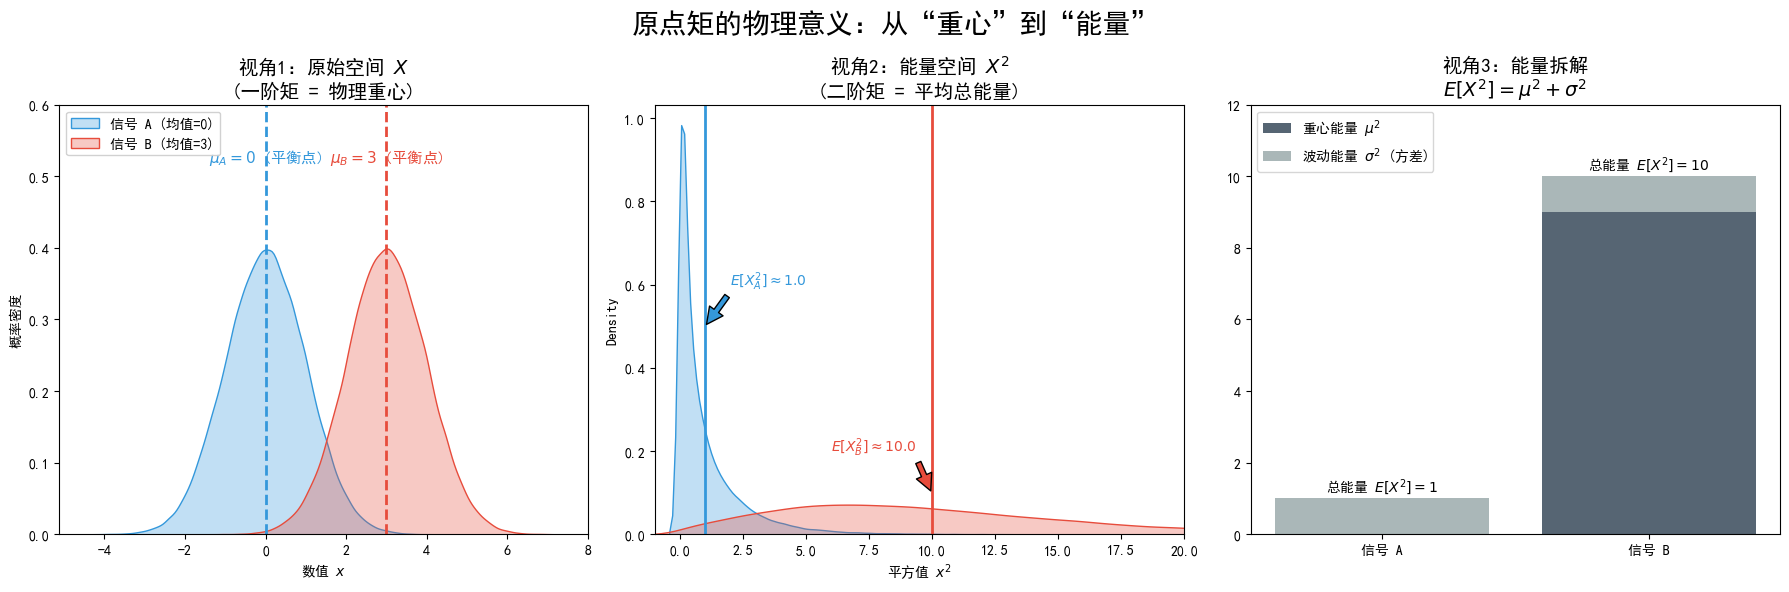

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# ==============================================================================
# 核心笔记 1.1：原点矩的可视化 (Origin Moments Visualization)
# ==============================================================================
# 目标：通过对比两个方差相同但均值不同的分布，揭示：
# 1. 一阶原点矩 E[X] 是“平衡点” (重心)。
# 2. 二阶原点矩 E[X^2] 是“总能量” (Power)。
# 3. 验证公式：E[X^2] = Var(X) + (E[X])^2
#    即：总能量 = 波动能量(AC) + 直流能量(DC)
# ==============================================================================

# ==========================================
# 0. 数据构造 (Construction)
# ==========================================
np.random.seed(2025)
n_samples = 100000

# 构造两个信号：
# Signal A: 纯交流信号 (均值=0, 方差=1)
mu_A, sigma_A = 0, 1
X_A = np.random.normal(mu_A, sigma_A, n_samples)

# Signal B: 带直流偏置的信号 (均值=3, 方差=1)
# 注意：它只是把 A 向右平移了 3，形状完全没变！
mu_B, sigma_B = 3, 1
X_B = np.random.normal(mu_B, sigma_B, n_samples)

# 计算二阶原点矩 (模拟值)
m2_A = np.mean(X_A**2)
m2_B = np.mean(X_B**2)

# ==========================================
# 绘图部分 (Visual Verification)
# ==========================================
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False     # 用来正常显示负号

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 颜色定义
c_A = '#3498db'  # 蓝色 (Signal A)
c_B = '#e74c3c'  # 红色 (Signal B)
c_DC = '#2c3e50' # 深色 (代表直流/重心能量)
c_AC = '#95a5a6' # 灰色 (代表交流/波动能量)

# --- 图1：原始空间 (一阶原点矩/重心) ---
ax1 = axes[0]
sns.kdeplot(X_A, fill=True, color=c_A, alpha=0.3, label='信号 A (均值=0)', ax=ax1)
sns.kdeplot(X_B, fill=True, color=c_B, alpha=0.3, label='信号 B (均值=3)', ax=ax1)

# [修改1] 强制拉高 Y 轴上限，留出顶部 30% 的空白写字
ax1.set_ylim(0, 0.6) 

# 标注重心
ax1.axvline(mu_A, color=c_A, linestyle='--', linewidth=2)
ax1.axvline(mu_B, color=c_B, linestyle='--', linewidth=2)

# [修改2] 将文字位置上移到 0.52 (避开曲线波峰)
ax1.text(mu_A, 0.52, rf'$\mu_A={mu_A}$ (平衡点)', color=c_A, ha='center', fontweight='bold', fontsize=11)
ax1.text(mu_B, 0.52, rf'$\mu_B={mu_B}$ (平衡点)', color=c_B, ha='center', fontweight='bold', fontsize=11)

ax1.set_title('视角1：原始空间 $X$\n(一阶矩 = 物理重心)', fontsize=14)
ax1.set_xlabel('数值 $x$')
ax1.set_ylabel('概率密度')

# [修改3] 强制图例在“左上角”，防止遮挡中间和右边的文字
ax1.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.9)

# --- 图2：能量空间 (二阶原点矩/总能量) ---
ax2 = axes[1]
# 注意：这里画的是 X^2 的分布！
sns.kdeplot(X_A**2, fill=True, color=c_A, alpha=0.3, label=r'信号 A: $X_A^2$', ax=ax2)
sns.kdeplot(X_B**2, fill=True, color=c_B, alpha=0.3, label=r'信号 B: $X_B^2$', ax=ax2)

# 标注二阶矩 (期望值)
ax2.axvline(m2_A, color=c_A, linestyle='-', linewidth=2)
ax2.axvline(m2_B, color=c_B, linestyle='-', linewidth=2)

ax2.annotate(rf'$E[X_A^2] \approx {m2_A:.1f}$', xy=(m2_A, 0.5), xytext=(2, 0.6),
             arrowprops=dict(facecolor=c_A, shrink=0.05), color=c_A, fontweight='bold')
ax2.annotate(rf'$E[X_B^2] \approx {m2_B:.1f}$', xy=(m2_B, 0.1), xytext=(m2_B-4, 0.2),
             arrowprops=dict(facecolor=c_B, shrink=0.05), color=c_B, fontweight='bold')

ax2.set_title('视角2：能量空间 $X^2$\n(二阶矩 = 平均总能量)', fontsize=14)
ax2.set_xlabel(r'平方值 $x^2$')
ax2.set_xlim(-1, 20) # 限制范围以便看清

# --- 图3：能量拆解 (方差分解公式) ---
ax3 = axes[2]
labels = ['信号 A', '信号 B']
# 直流能量 (Mean^2)
dc_energy = [mu_A**2, mu_B**2] 
# 交流能量 (Variance)
ac_energy = [sigma_A**2, sigma_B**2]

# 堆叠柱状图
ax3.bar(labels, dc_energy, label=r'重心能量 $\mu^2$', color=c_DC, alpha=0.8)
ax3.bar(labels, ac_energy, bottom=dc_energy, label=r'波动能量 $\sigma^2$ (方差)', color=c_AC, alpha=0.8)

# 标注总高度
total_A = dc_energy[0] + ac_energy[0]
total_B = dc_energy[1] + ac_energy[1]
ax3.text(0, total_A + 0.2, rf'总能量 $E[X^2]={total_A}$', ha='center', color='black', fontweight='bold')
ax3.text(1, total_B + 0.2, rf'总能量 $E[X^2]={total_B}$', ha='center', color='black', fontweight='bold')

ax3.set_title('视角3：能量拆解\n$E[X^2] = \\mu^2 + \\sigma^2$', fontsize=14)
ax3.set_ylim(0, 12)
ax3.legend()

# 装饰
plt.suptitle('原点矩的物理意义：从“重心”到“能量”', fontsize=20, y=0.98)
plt.tight_layout()

# 保存
output_dir = "moment_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
save_path = f"{output_dir}/origin_moments_energy.png"
plt.savefig(save_path, dpi=300)

print(f"图片已保存: {save_path}")
plt.show()

In [ ]:
# 1.2. 中心矩

In [ ]:
# ==============================================================================
# 核心笔记 1.2：中心矩 (Central Moments) - 形状的描述者
# ==============================================================================
#
# 1. 核心定义 (Mathematical Definition)
# ------------------------------------------------------------------------------
# 中心矩是将坐标系原点移到重心 \mu 之后计算的矩。
# 记为 \mu_k (或 m_k)。
#
#   \mu_k = E[(X - \mu)^k] = \int (x - \mu)^k f(x) dx
#
#   - [操作核心]: "Center the data" (中心化)。
#   - [本质]: 剥离了“位置”信息，只关注分布的【形状】。
#
# 2. 逐阶解析与直觉 (Intuition by Order)
# ------------------------------------------------------------------------------
# [k=1] 一阶中心矩: E[X - \mu] = 0
#   - 意义：恒等于 0。
#   - 直觉：以重心为支点，左边的力矩和右边的力矩完美抵消。
#
# [k=2] 二阶中心矩: \sigma^2 (方差 Variance)
#   - 物理意义：【转动惯量】。衡量粒子绕重心旋转的难易程度。
#   - 几何意义：【胖瘦 / 离散度】。
#   - 信号意义：交流功率 (AC Power)。扣除直流后的纯波动能量。
#
# [k=3] 三阶中心矩: \mu_3 -> 【偏度 Skewness】
#   - 为什么是 3 次方？因为 3 次方保留符号 (+/-)。
#   - 几何意义：【歪斜程度 / 不对称性】。
#       * \mu_3 > 0 (右偏/正偏): 尾巴向右拖长 (均值 > 中位数)。
#       * \mu_3 < 0 (左偏/负偏): 尾巴向左拖长。
#       * \mu_3 = 0: 对称分布 (如正态)。
#
# [k=4] 四阶中心矩: \mu_4 -> 【峰度 Kurtosis】
#   - 为什么是 4 次方？4 次方对远处的异常值极其敏感 (放大器)。
#   - 几何意义：【厚尾程度 / 极端值概率】(Tail Risk)。
#       * 它是衡量“异常值”出现的频次，而不仅仅是峰有多尖。
#       * \mu_4 越大，黑天鹅事件(Outliers)概率越大。
#
# 3. 标准化系数 (Standardization)
# ------------------------------------------------------------------------------
# 原始的 \mu_k 带有单位 (如 m^3, m^4)，为了横向比较，通常进行无量纲化：
#
#   - 偏度系数 (Skewness): S = \mu_3 / \sigma^3
#   - 峰度系数 (Kurtosis): K = \mu_4 / \sigma^4
#
#   [基准线]: 正态分布的 K = 3。
#   (注：有时使用 "超额峰度 Excess Kurtosis" = K - 3，正态分布为 0)
#
# 4. 总结 (Summary)
# ------------------------------------------------------------------------------
# 原点矩 (Origin Moments) -> 告诉我们数据【在哪里】(Location) 和 【有多强】(Energy)。
# 中心矩 (Central Moments) -> 告诉我们数据【长什么样】(Shape: Spread, Skew, Fat-tail)。
# ==============================================================================

图片已保存: moment_images/central_moments_skew_kurt.png


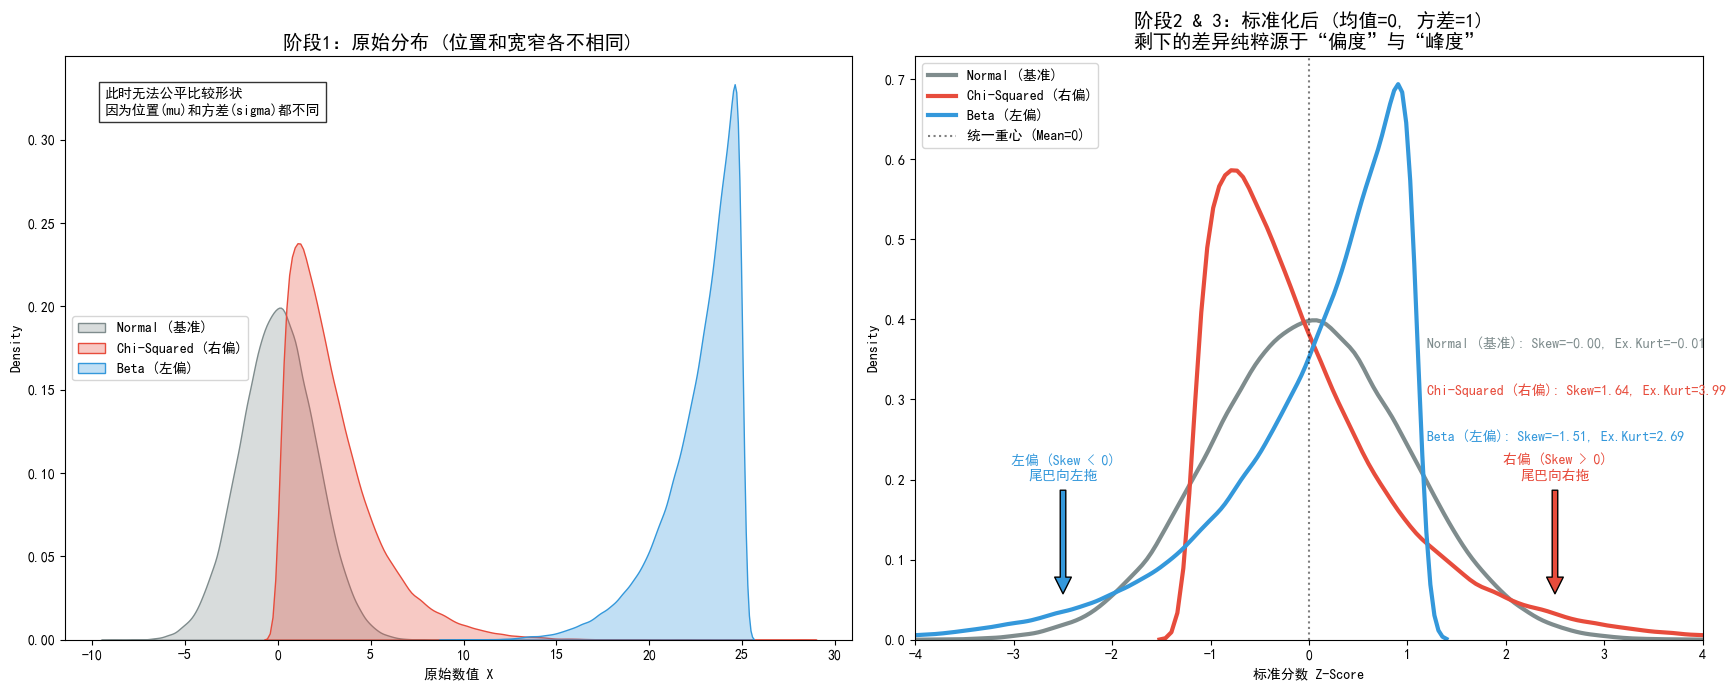

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# ==============================================================================
# 核心笔记 1.2：中心矩的逐阶解构 (Deconstructing Central Moments)
# ==============================================================================
# 目标：通过“标准化”过程，剥离低阶矩，通过对比看见高阶矩(形状)。
#
# 选角：
# 1. Normal: 对称基准 (Skew=0, Kurt=3)
# 2. Chi2(3): 右偏代表 (Skew>0)
# 3. Beta(10,1): 左偏代表 (Skew<0)
# ==============================================================================

# ==========================================
# 0. 数据构造 (Data Generation)
# ==========================================
np.random.seed(42)
n = 100000

# 1. 正态分布 (基准)
data_norm = np.random.normal(0, 2, n)

# 2. 卡方分布 (右偏) - df=3
data_chi2 = np.random.chisquare(df=3, size=n)

## 3. Beta分布 (左偏) - a=2, b=1 (大概率取大值，尾巴在左边)
#data_beta = np.random.beta(a=2, b=1, size=n)

# 3. Beta分布 (左偏代表) - 修正参数！
# 原始 Beta(10, 1) 在 [0, 1] 之间。
# 策略：放大 25 倍，使其范围变成 [0, 25]，标准差变大到约 2.0，与上面两位“门当户对”。
scale_factor = 25
data_beta_raw = np.random.beta(a=10, b=1, size=n)
data_beta = data_beta_raw * scale_factor

# 将数据打包以便迭代
datasets = {
    'Normal (基准)': data_norm,
    'Chi-Squared (右偏)': data_chi2,
    'Beta (左偏)': data_beta
}

# 颜色映射
colors = {'Normal (基准)': '#7f8c8d',     # 灰色
          'Chi-Squared (右偏)': '#e74c3c', # 红色
          'Beta (左偏)': '#3498db'}        # 蓝色

# ==========================================
# 1. 核心计算：标准化 (Standardization)
# ==========================================
# 我们不仅要画原始图，更要画“Z-Score”图
# Z = (X - mu) / sigma
# 经过这一步，所有数据的 mu=0, sigma=1。剩下的差异全是 3阶和4阶矩的功劳。

std_datasets = {}
stats_info = {}

for name, data in datasets.items():
    mu = np.mean(data)
    sigma = np.std(data)
    
    # 标准化
    z_data = (data - mu) / sigma
    std_datasets[name] = z_data
    
    # 计算3阶和4阶矩 (无偏估计)
    skew_val = stats.skew(data)
    kurt_val = stats.kurtosis(data) # Scipy默认返回的是超额峰度 (K-3)
    
    stats_info[name] = (mu, sigma, skew_val, kurt_val)

# ==========================================
# 2. 绘图：三阶递进展示 (The 3 Stages)
# ==========================================
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- 图1：原始世界 (Raw World) ---
# 展示 mu_1 (位置) 和 mu_2 (尺度) 的不同
ax1 = axes[0]
for name, data in datasets.items():
    sns.kdeplot(data, fill=True, alpha=0.3, label=name, color=colors[name], ax=ax1)

ax1.set_title('阶段1：原始分布 (位置和宽窄各不相同)', fontsize=14, fontweight='bold')
ax1.set_xlabel('原始数值 X')
ax1.legend()
# 标注说明
ax1.text(0.05, 0.9, '此时无法公平比较形状\n因为位置(mu)和方差(sigma)都不同', 
         transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))


# --- 图2：标准化世界 (Standardized World) ---
# 此时 mu=0, sigma=1。这是“形状”的纯粹竞技场。
ax2 = axes[1]
for name, z_data in std_datasets.items():
    sns.kdeplot(z_data, fill=False, linewidth=3, label=name, color=colors[name], ax=ax2)

# 添加装饰线
ax2.axvline(0, color='black', linestyle=':', alpha=0.5, label='统一重心 (Mean=0)')

# 动态标注统计量
y_pos = 0.5
for name, vals in stats_info.items():
    skew, kurt = vals[2], vals[3]
    info_text = f"{name}: Skew={skew:.2f}, Ex.Kurt={kurt:.2f}"
    ax2.text(0.65, y_pos, info_text, transform=ax2.transAxes, color=colors[name], fontweight='bold', fontsize=10)
    y_pos -= 0.08

ax2.set_title('阶段2 & 3：标准化后 (均值=0, 方差=1)\n剩下的差异纯粹源于“偏度”与“峰度”', fontsize=14, fontweight='bold')
ax2.set_xlabel('标准分数 Z-Score')
ax2.set_xlim(-4, 4) # 聚焦核心区域
ax2.legend(loc='upper left')

# --- 教学标注：偏度的物理直觉 ---
# 在图2上直接画箭头说明
# 右偏说明
ax2.annotate('右偏 (Skew > 0)\n尾巴向右拖', xy=(2.5, 0.05), xytext=(2.5, 0.2),
             arrowprops=dict(facecolor=colors['Chi-Squared (右偏)'], shrink=0.05),
             color=colors['Chi-Squared (右偏)'], ha='center')
# 左偏说明
ax2.annotate('左偏 (Skew < 0)\n尾巴向左拖', xy=(-2.5, 0.05), xytext=(-2.5, 0.2),
             arrowprops=dict(facecolor=colors['Beta (左偏)'], shrink=0.05),
             color=colors['Beta (左偏)'], ha='center')

plt.tight_layout()

# 保存
output_dir = "moment_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
save_path = f"{output_dir}/central_moments_skew_kurt.png"
plt.savefig(save_path, dpi=300)

print(f"图片已保存: {save_path}")
plt.show()

图片已保存: moment_images/moments_decomposition_refined.png


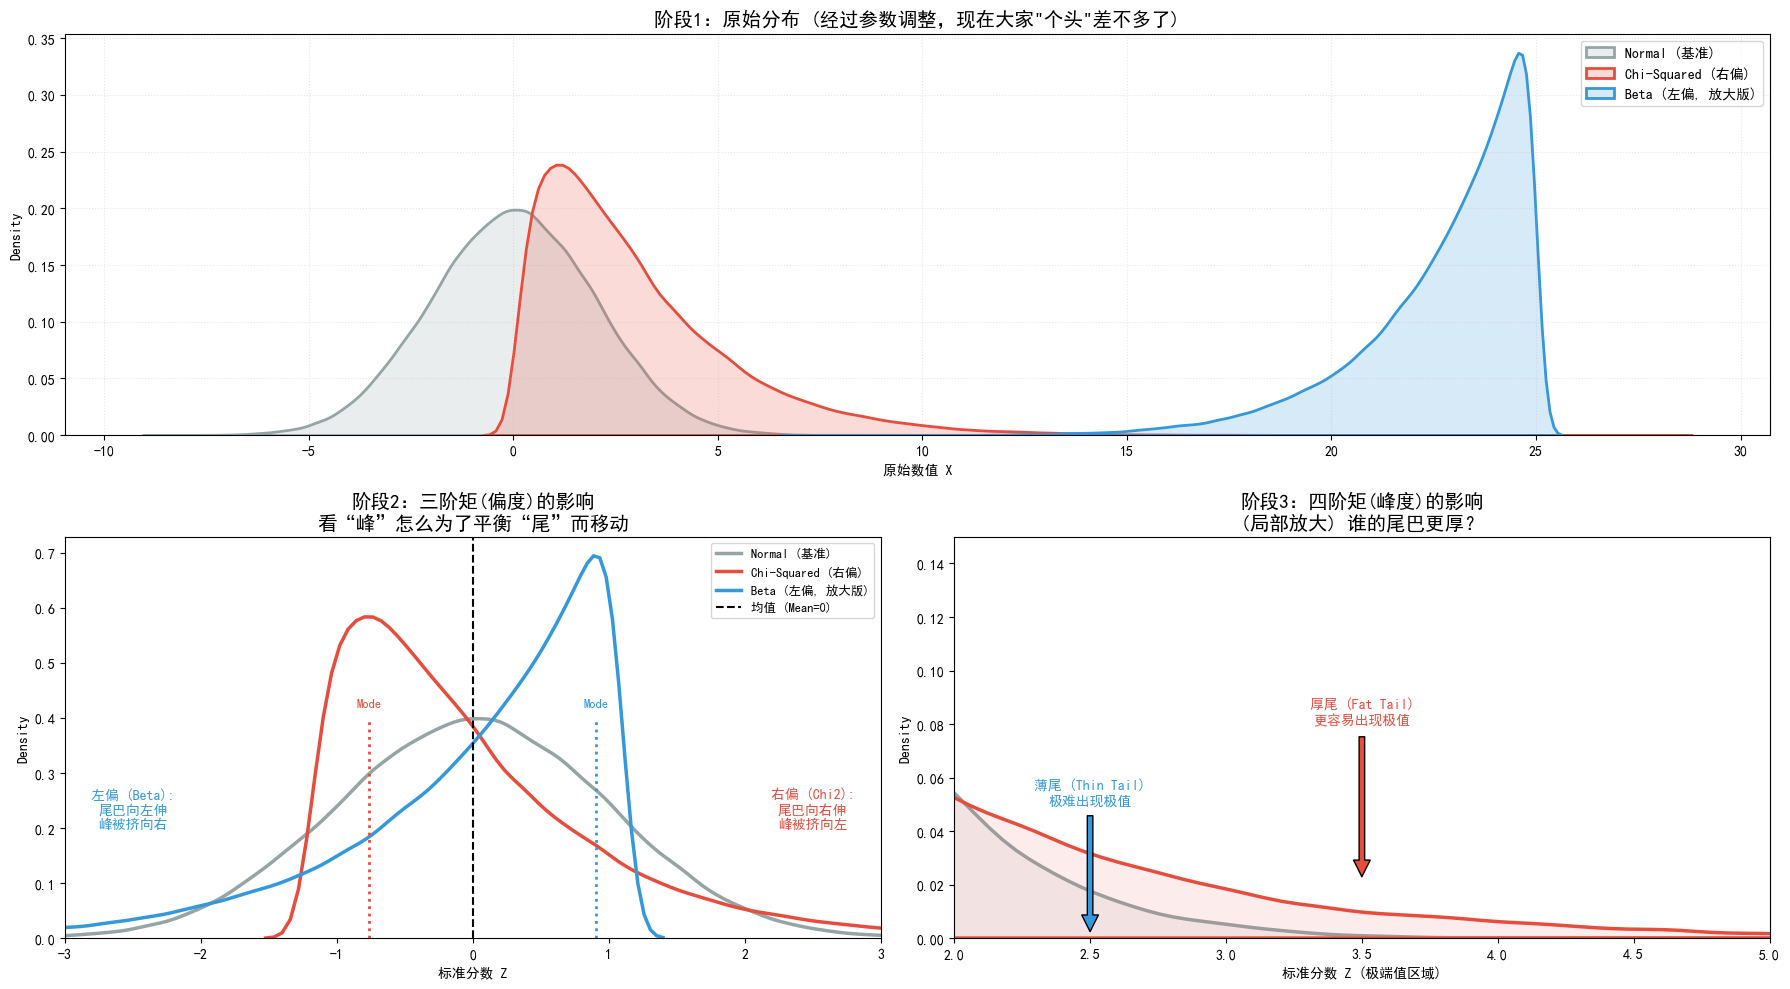

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# ==============================================================================
# 核心笔记 1.2 (修正版)：形状的极致对比
# ==============================================================================
# 改进点：
# 1. 对 Beta 分布进行“扩缩放” (Scaling)，解决图1中比例失调的问题。
# 2. 在标准化图中，增加辅助线和标注，直观解构 偏度(Skew) 和 峰度(Kurt)。
# ==============================================================================

output_dir = "moment_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# ==========================================
# 0. 数据构造 (精心调参)
# ==========================================
np.random.seed(2025)
n = 100000

# 1. 正态分布 (基准)
# Mean=0, Std=2 (故意设大一点，方便看原始图)
data_norm = np.random.normal(0, 2, n)

# 2. 卡方分布 (右偏代表)
# df=3. Mean=3, Std=sqrt(6)≈2.45
data_chi2 = np.random.chisquare(df=3, size=n)

# 3. Beta分布 (左偏代表) - 修正参数！
# 原始 Beta(10, 1) 在 [0, 1] 之间。
# 策略：放大 25 倍，使其范围变成 [0, 25]，标准差变大到约 2.0，与上面两位“门当户对”。
scale_factor = 25
data_beta_raw = np.random.beta(a=10, b=1, size=n)
data_beta = data_beta_raw * scale_factor

datasets = {
    'Normal (基准)': data_norm,
    'Chi-Squared (右偏)': data_chi2,
    'Beta (左偏, 放大版)': data_beta
}

colors = {'Normal (基准)': '#95a5a6',     # 灰色 (低调的基准)
          'Chi-Squared (右偏)': '#e74c3c', # 红色 (警示)
          'Beta (左偏, 放大版)': '#3498db'} # 蓝色 (冷静)

# ==========================================
# 1. 计算标准化数据与统计量
# ==========================================
std_data = {}
stats_dict = {}

for name, data in datasets.items():
    mu = np.mean(data)
    sigma = np.std(data)
    
    # 标准化 (Z-Score)
    z = (data - mu) / sigma
    std_data[name] = z
    
    # 计算偏度和峰度
    sk = stats.skew(data)
    ku = stats.kurtosis(data) # Fisher峰度 (正态=0)
    
    # 寻找峰值位置 (Mode) - 通过直方图近似寻找
    # 这里用一个小技巧：计算KDE的峰值
    density = stats.gaussian_kde(z)
    xs = np.linspace(-5, 5, 1000)
    ys = density(xs)
    mode_x = xs[np.argmax(ys)]
    
    stats_dict[name] = {'skew': sk, 'kurt': ku, 'mode': mode_x}

# ==========================================
# 2. 绘图：双重竞技场
# ==========================================
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2) # 2行2列布局

# --- 图1：原始世界 (Raw World) - 修正后 ---
ax1 = fig.add_subplot(gs[0, :]) # 占据第一行整行

for name, data in datasets.items():
    sns.kdeplot(data, fill=True, alpha=0.2, label=name, color=colors[name], ax=ax1, linewidth=2)

ax1.set_title('阶段1：原始分布 (经过参数调整，现在大家"个头"差不多了)', fontsize=14, fontweight='bold')
ax1.set_xlabel('原始数值 X')
ax1.legend()
ax1.grid(True, linestyle=':', alpha=0.3)

# --- 图2：标准化世界 - 偏度解析 (Skewness Focus) ---
ax2 = fig.add_subplot(gs[1, 0])

# 画线
for name, z in std_data.items():
    sns.kdeplot(z, fill=False, linewidth=2.5, label=name, color=colors[name], ax=ax2)

# 辅助线：均值 (永远在0)
ax2.axvline(0, color='black', linestyle='--', linewidth=1.5, label='均值 (Mean=0)')

# 标注：峰值偏移 (体现三阶矩)
for name, info in stats_dict.items():
    mode_x = info['mode']
    c = colors[name]
    # 画一条从峰顶指下来的短线
    if name != 'Normal (基准)': # 正态太挤了不画
        ax2.vlines(mode_x, 0, 0.4, color=c, linestyle=':', linewidth=2)
        ax2.text(mode_x, 0.42, 'Mode', color=c, ha='center', fontweight='bold', fontsize=9)

ax2.set_title('阶段2：三阶矩(偏度)的影响\n看“峰”怎么为了平衡“尾”而移动', fontsize=14, fontweight='bold')
ax2.set_xlabel('标准分数 Z')
ax2.set_xlim(-3, 3)
ax2.legend(loc='upper right', fontsize=9)

# 添加偏度直觉文字
ax2.text(-2.5, 0.2, "左偏 (Beta):\n尾巴向左伸\n峰被挤向右", color=colors['Beta (左偏, 放大版)'], ha='center')
ax2.text(2.5, 0.2, "右偏 (Chi2):\n尾巴向右伸\n峰被挤向左", color=colors['Chi-Squared (右偏)'], ha='center')


# --- 图3：标准化世界 - 峰度解析 (Kurtosis Focus) ---
# 这里我们只展示“尾部”，放大看细节
ax3 = fig.add_subplot(gs[1, 1])

for name, z in std_data.items():
    # 还是画全图，但限制视野
    sns.kdeplot(z, fill=True, alpha=0.1, linewidth=2.5, label=name, color=colors[name], ax=ax3)

# 聚焦右尾部 (放大镜效果)
ax3.set_xlim(2.0, 5.0) 
ax3.set_ylim(0, 0.15) # 只看贴地飞行的部分

ax3.set_title('阶段3：四阶矩(峰度)的影响\n(局部放大) 谁的尾巴更厚？', fontsize=14, fontweight='bold')
ax3.set_xlabel('标准分数 Z (极端值区域)')

# 标注厚尾
ax3.annotate('厚尾 (Fat Tail)\n更容易出现极值', xy=(3.5, 0.02), xytext=(3.5, 0.08),
             arrowprops=dict(facecolor=colors['Chi-Squared (右偏)'], shrink=0.05),
             color=colors['Chi-Squared (右偏)'], ha='center', fontweight='bold')

ax3.annotate('薄尾 (Thin Tail)\n极难出现极值', xy=(2.5, 0.0), xytext=(2.5, 0.05),
             arrowprops=dict(facecolor=colors['Beta (左偏, 放大版)'], shrink=0.05),
             color=colors['Beta (左偏, 放大版)'], ha='center', fontweight='bold')

plt.tight_layout()
save_path = f"{output_dir}/moments_decomposition_refined.png"
plt.savefig(save_path, dpi=300)
print(f"图片已保存: {save_path}")
plt.show()

图片已保存: moment_images/moments_3_steps_evolution.png


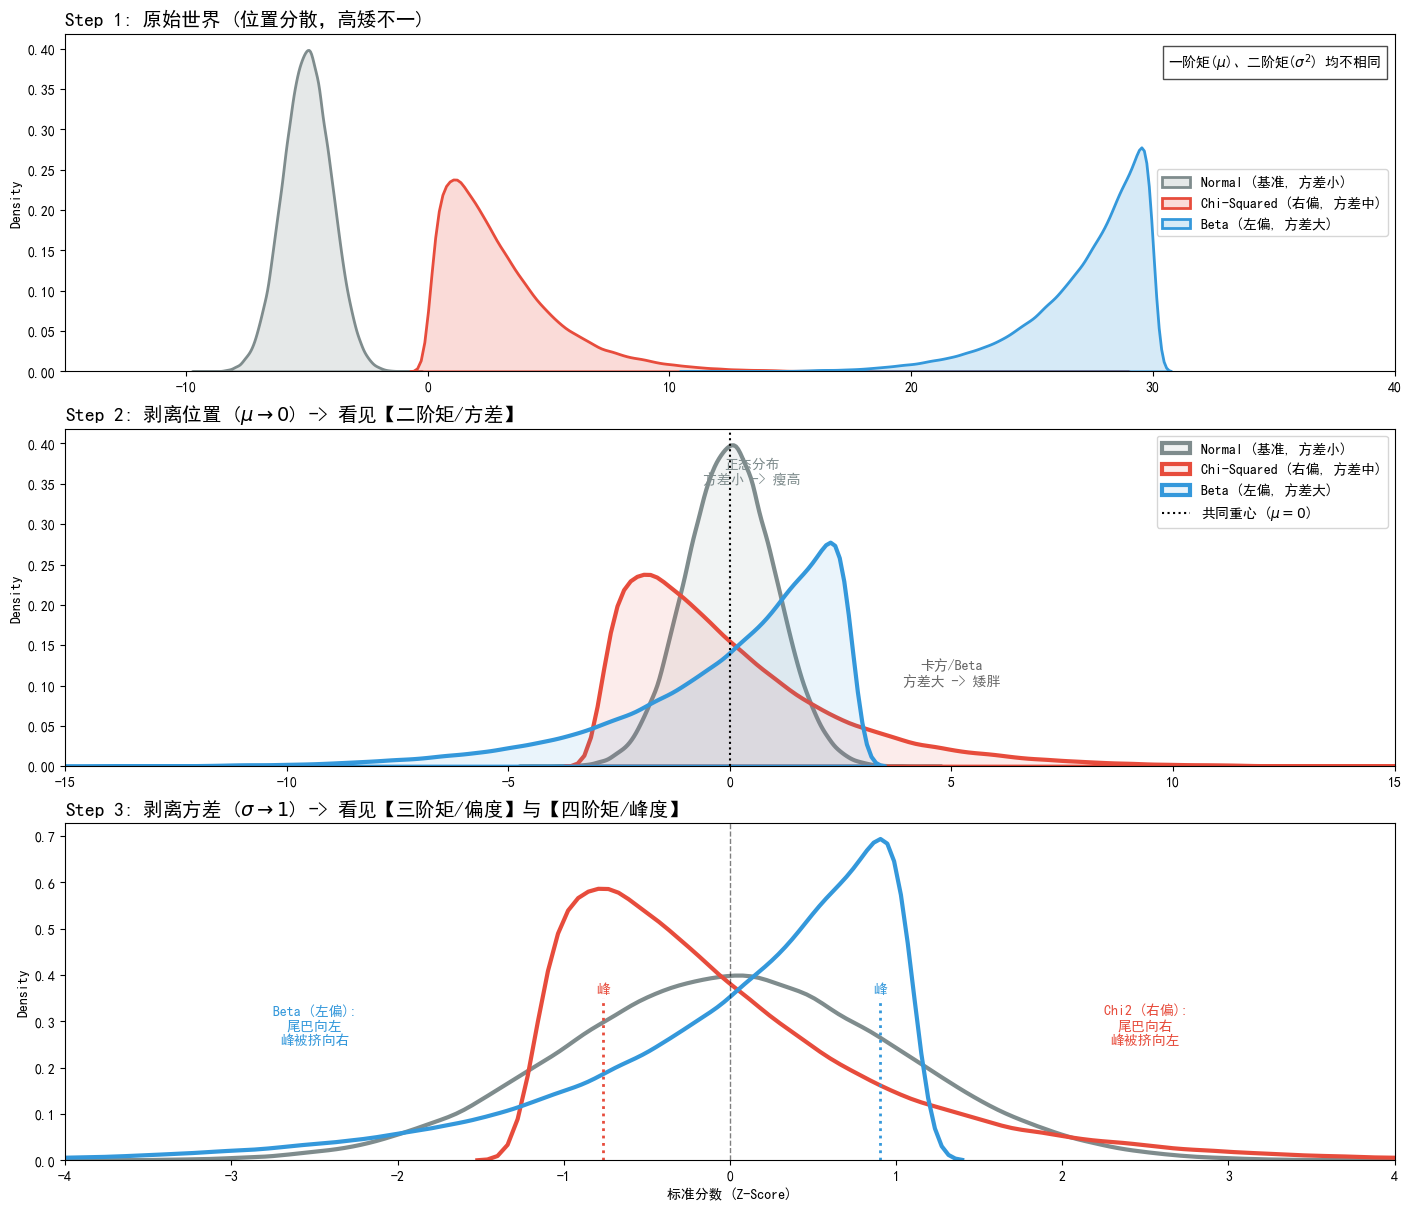

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# ==============================================================================
# 核心笔记 1.2 (最终版)：矩的完全解构 (已修正转义字符)
# ==============================================================================
# 逻辑流：
# Row 1: 原始数据 (Raw) -> 位置不同，方差不同，形状不同。
# Row 2: 中心化数据 (Centered) -> 均值统一为0。展现【二阶矩/方差】差异。
# Row 3: 标准化数据 (Standardized) -> 方差统一为1。展现【三、四阶矩/形状】差异。
# ==============================================================================

output_dir = "moment_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# ==========================================
# 0. 数据构造 (故意制造方差差异)
# ==========================================
np.random.seed(42)
n = 100000

# 1. 正态分布 (基准)
# Mean = -5, Std = 1
data_norm = np.random.normal(-5, 1, n)

# 2. 卡方分布 (右偏)
# df=3. Mean=3, Std=sqrt(6) ≈ 2.45
data_chi2 = np.random.chisquare(df=3, size=n)

# 3. Beta分布 (左偏)
# 放大系数设为 30，使其方差变得更大
scale_factor = 30
data_beta = np.random.beta(a=10, b=1, size=n) * scale_factor

datasets = {
    'Normal (基准, 方差小)': data_norm,
    'Chi-Squared (右偏, 方差中)': data_chi2,
    'Beta (左偏, 方差大)': data_beta
}

colors = {
    'Normal (基准, 方差小)': '#7f8c8d',
    'Chi-Squared (右偏, 方差中)': '#e74c3c',
    'Beta (左偏, 方差大)': '#3498db'
}

# ==========================================
# 1. 数据预处理：计算三层状态
# ==========================================
plot_data = {
    'Raw': {},
    'Centered': {},
    'Standardized': {}
}

stats_info = {}

for name, data in datasets.items():
    mu = np.mean(data)
    sigma = np.std(data)
    
    # 1. 原始
    plot_data['Raw'][name] = data
    
    # 2. 仅中心化 (Centered): X - mu
    plot_data['Centered'][name] = data - mu
    
    # 3. 标准化 (Standardized): (X - mu) / sigma
    plot_data['Standardized'][name] = (data - mu) / sigma
    
    # 记录峰值位置 (Mode) 用于 Row 3 标注
    z_data = plot_data['Standardized'][name]
    density = stats.gaussian_kde(z_data)
    xs = np.linspace(-4, 4, 500)
    mode_x = xs[np.argmax(density(xs))]
    stats_info[name] = mode_x

# ==========================================
# 2. 绘图：三行布局 (The 3-Row Layout)
# ==========================================
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(3, 1, figsize=(14, 12), constrained_layout=True)

# --- Row 1: 原始世界 (Location & Scale & Shape) ---
ax1 = axes[0]
for name, data in plot_data['Raw'].items():
    sns.kdeplot(data, fill=True, alpha=0.2, label=name, color=colors[name], ax=ax1, linewidth=2)

ax1.set_title('Step 1: 原始世界 (位置分散，高矮不一)', fontsize=14, fontweight='bold', loc='left')
# 修正 Line 100: 在字符串前添加 r
ax1.text(0.99, 0.9, r'一阶矩($\mu$)、二阶矩($\sigma^2$) 均不相同', transform=ax1.transAxes, ha='right', bbox=dict(facecolor='white', alpha=0.7))
ax1.legend()
ax1.set_xlim(-15, 40)

# --- Row 2: 中心化世界 (Variance Focus) ---
ax2 = axes[1]
for name, data in plot_data['Centered'].items():
    sns.kdeplot(data, fill=True, alpha=0.1, linewidth=3, label=name, color=colors[name], ax=ax2)

# 修正 Line 109: 在 label 前添加 r
ax2.axvline(0, color='black', linestyle=':', linewidth=1.5, label=r'共同重心 ($\mu=0$)') 
# 修正 Line 110: 在 title 前添加 r
ax2.set_title(r'Step 2: 剥离位置 ($\mu \to 0$) -> 看见【二阶矩/方差】', fontsize=14, fontweight='bold', loc='left') 
ax2.set_xlim(-15, 15)

# 标注：展示方差带来的高矮胖瘦
ax2.text(0.5, 0.35, "正态分布\n方差小 -> 瘦高", color=colors['Normal (基准, 方差小)'], ha='center', fontweight='bold')
ax2.text(5, 0.1, "卡方/Beta\n方差大 -> 矮胖", color='black', ha='center', alpha=0.6)
ax2.legend(loc='upper right')

# --- Row 3: 标准化世界 (Shape Focus) ---
ax3 = axes[2]
for name, data in plot_data['Standardized'].items():
    sns.kdeplot(data, fill=False, linewidth=3, label=name, color=colors[name], ax=ax3)

ax3.axvline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
# 修正 Line 126: 在 title 前添加 r
ax3.set_title(r'Step 3: 剥离方差 ($\sigma \to 1$) -> 看见【三阶矩/偏度】与【四阶矩/峰度】', fontsize=14, fontweight='bold', loc='left')
ax3.set_xlim(-4, 4)

# 标注偏度带来的 Mode 偏移
for name, mode_x in stats_info.items():
    if 'Normal' not in name:
        c = colors[name]
        ax3.vlines(mode_x, 0, 0.35, color=c, linestyle=':', linewidth=2)
        ax3.text(mode_x, 0.36, '峰', color=c, ha='center', fontweight='bold')
        
# 标注说明
ax3.text(-2.5, 0.25, "Beta (左偏):\n尾巴向左\n峰被挤向右", color=colors['Beta (左偏, 方差大)'], ha='center', fontsize=10)
ax3.text(2.5, 0.25, "Chi2 (右偏):\n尾巴向右\n峰被挤向左", color=colors['Chi-Squared (右偏, 方差中)'], ha='center', fontsize=10)

ax3.set_xlabel('标准分数 (Z-Score)')

# 保存
save_path = f"{output_dir}/moments_3_steps_evolution.png"
plt.savefig(save_path, dpi=300)
print(f"图片已保存: {save_path}")
plt.show()

图片已保存: moment_images/moments_full_decomposition_1_1_2.png


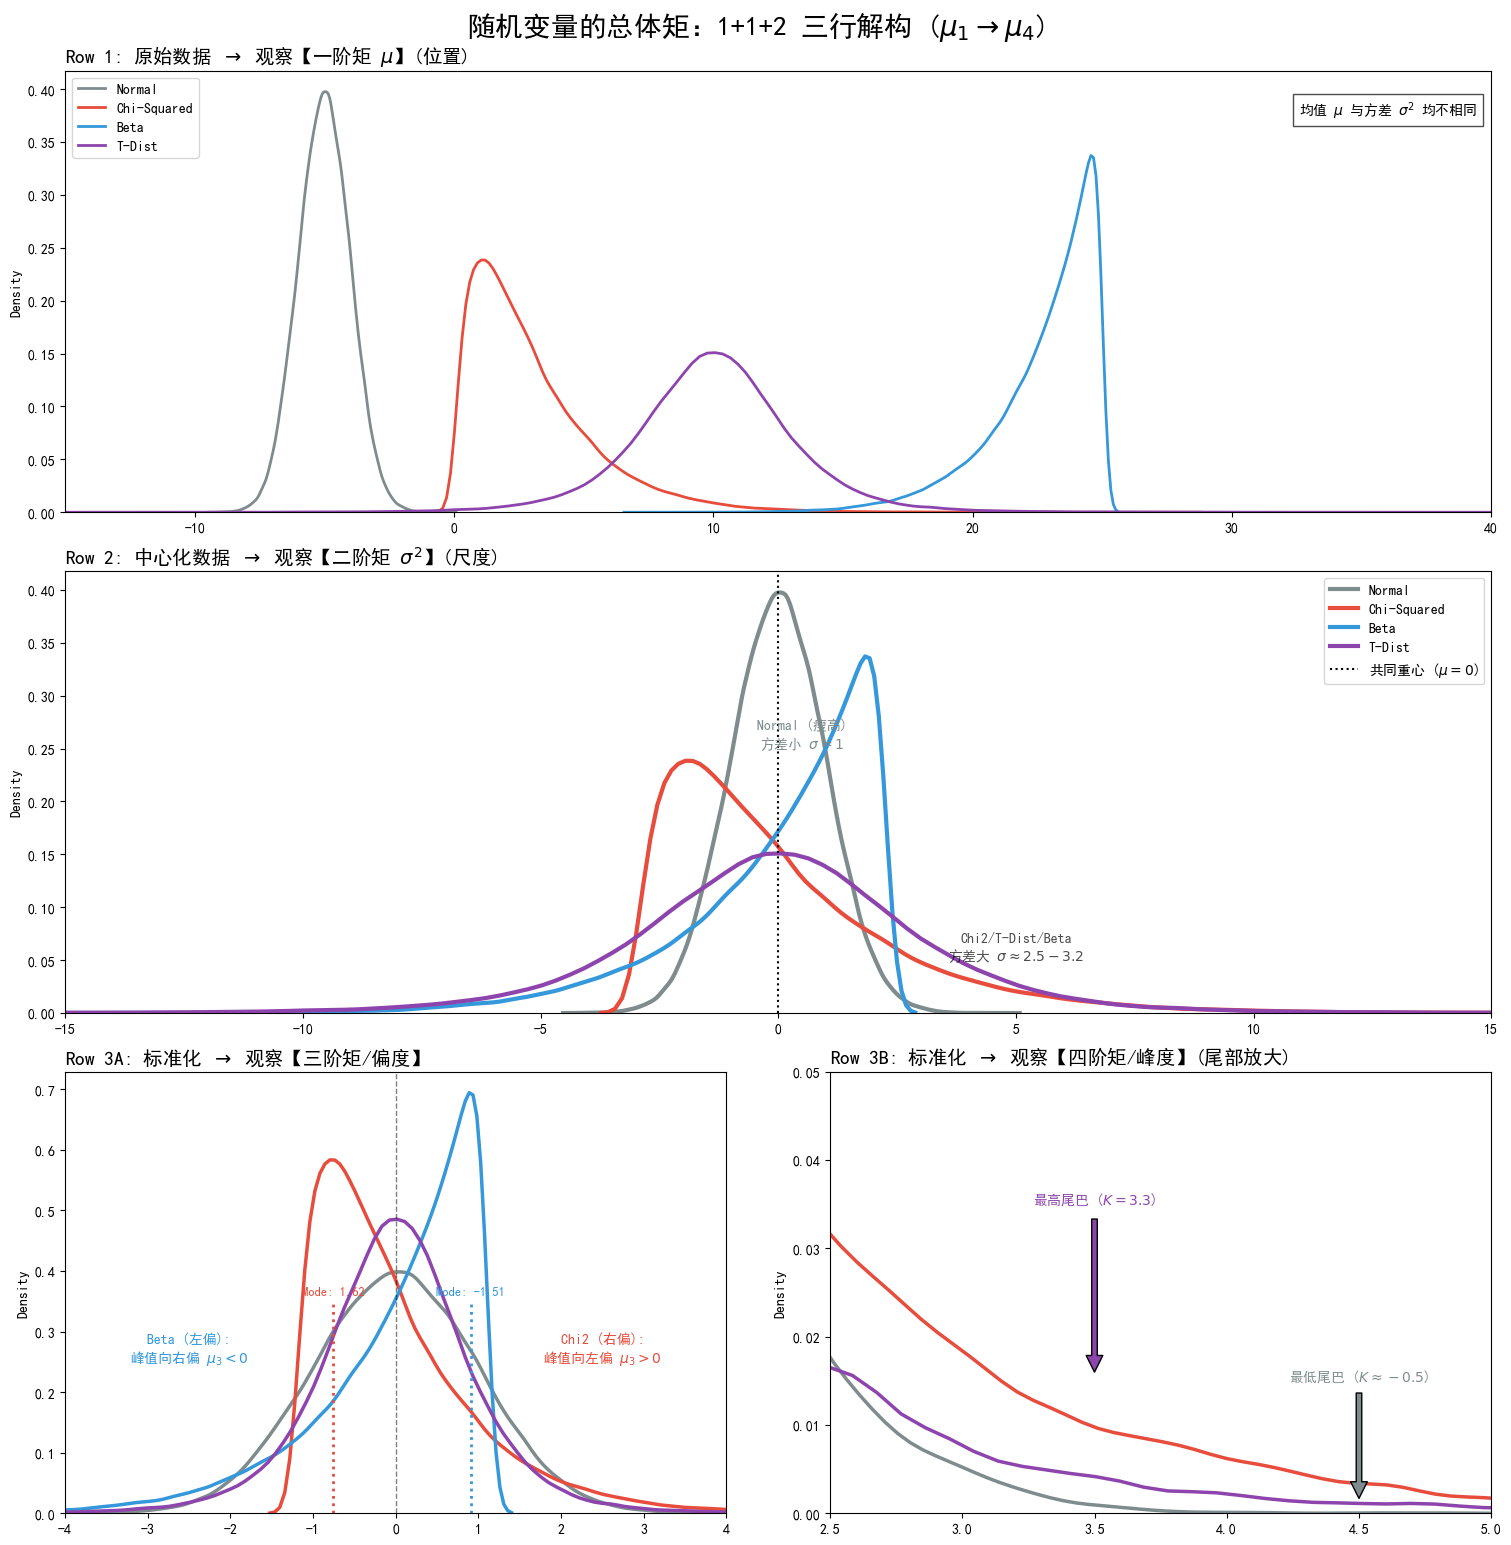

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# ==============================================================================
# 核心笔记 1.2 (最终修复版)：矩的 1+1+2 完全解构
# ==============================================================================
# 修复点：
# 1. 所有 LaTeX 字符串前添加 r 前缀，防止 \approx 被转义为 \x07 (响铃符)。
# 2. 移除 plt.subplots_adjust，避免与 constrained_layout 冲突。
# ==============================================================================

output_dir = "moment_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# ==========================================
# 0. 数据构造
# ==========================================
np.random.seed(2025)
n = 100000

# 1. Normal (基准) - 低方差
data_norm = np.random.normal(loc=-5, scale=1, size=n) 

# 2. Chi2(3) (右偏) - 中方差
data_chi2 = np.random.chisquare(df=3, size=n) 

# 3. Beta(10,1) (左偏) - 高方差
scale_factor = 25
data_beta = np.random.beta(a=10, b=1, size=n) * scale_factor 

# 4. Student's t (高厚尾)
data_t = stats.t.rvs(df=5, loc=10, scale=2.5, size=n) 

datasets_shape = {
    'Normal': data_norm,
    'Chi-Squared': data_chi2,
    'Beta': data_beta,
    'T-Dist': data_t
}

colors = {
    'Normal': '#7f8c8d',     # 灰色
    'Chi-Squared': '#e74c3c', # 红色
    'Beta': '#3498db',         # 蓝色
    'T-Dist': '#8e44ad'         # 紫色
}

# ==========================================
# 1. 核心处理
# ==========================================
plot_data = {
    'Raw': {},
    'Centered': {},
    'Standardized': {}
}

stats_info = {}

for name, data in datasets_shape.items():
    mu = np.mean(data)
    sigma = np.std(data)
    
    # 记录三层状态
    plot_data['Raw'][name] = data
    plot_data['Centered'][name] = data - mu
    plot_data['Standardized'][name] = (data - mu) / sigma
    
    # 计算统计量
    z_data = plot_data['Standardized'][name]
    sk = stats.skew(data)
    ku = stats.kurtosis(data)
    
    # 寻找峰值位置 (Mode)
    density = stats.gaussian_kde(z_data)
    xs = np.linspace(-4, 4, 500)
    mode_x = xs[np.argmax(density(xs))]
    
    stats_info[name] = {'skew': sk, 'kurt': ku, 'mode': mode_x}

# ==========================================
# 2. 绘图：1+1+2 布局
# ==========================================
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 使用 constrained_layout 自动管理间距
fig = plt.figure(figsize=(15, 15), constrained_layout=True)
gs = fig.add_gridspec(3, 2) 

# --- Row 1: 原始世界 (1列) ---
ax1 = fig.add_subplot(gs[0, :]) 

for name, data in plot_data['Raw'].items():
    sns.kdeplot(data, fill=False, label=name, color=colors[name], ax=ax1, linewidth=2)

ax1.set_title(r'Row 1: 原始数据 $\to$ 观察【一阶矩 $\mu$】(位置)', fontsize=14, fontweight='bold', loc='left')
ax1.set_xlim(-15, 40)
ax1.legend()
# [Fix] 添加 r 前缀
ax1.text(0.99, 0.9, r'均值 $\mu$ 与方差 $\sigma^2$ 均不相同', transform=ax1.transAxes, ha='right', bbox=dict(facecolor='white', alpha=0.7))


# --- Row 2: 中心化世界 (1列) ---
ax2 = fig.add_subplot(gs[1, :]) 

for name, data in plot_data['Centered'].items():
    sns.kdeplot(data, fill=False, linewidth=3, label=name, color=colors[name], ax=ax2)

# [Fix] 添加 r 前缀
ax2.axvline(0, color='black', linestyle=':', linewidth=1.5, label=r'共同重心 ($\mu=0$)')
ax2.set_title(r'Row 2: 中心化数据 $\to$ 观察【二阶矩 $\sigma^2$】(尺度)', fontsize=14, fontweight='bold', loc='left')
ax2.set_xlim(-15, 15)

# 标注：展示方差带来的高矮胖瘦
# [Fix] 添加 r 前缀
ax2.text(0.5, 0.25, r"Normal (瘦高)" + "\n" + r"方差小 $\sigma=1$", color=colors['Normal'], ha='center', fontweight='bold')
# [Fix] 关键修复：r"..." 防止 \approx 被转义
ax2.text(5, 0.05, r"Chi2/T-Dist/Beta" + "\n" + r"方差大 $\sigma \approx 2.5-3.2$", color='black', ha='center', alpha=0.7)
ax2.legend(loc='upper right')


# --- Row 3 Left: 偏度解析 (Skewness Focus) ---
ax3 = fig.add_subplot(gs[2, 0])

for name, z in plot_data['Standardized'].items():
    sns.kdeplot(z, fill=False, linewidth=2.5, label=name, color=colors[name], ax=ax3)

ax3.axvline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax3.set_title(r'Row 3A: 标准化 $\to$ 观察【三阶矩/偏度】', fontsize=14, fontweight='bold', loc='left')
ax3.set_xlim(-4, 4)

# 标注偏度带来的 Mode 偏移
for name, info in stats_info.items():
    mode_x = info['mode']
    c = colors[name]
    if np.abs(mode_x) > 0.1: 
        ax3.vlines(mode_x, 0, 0.35, color=c, linestyle=':', linewidth=2)
        ax3.text(mode_x, 0.36, rf'Mode: {info["skew"]:.2f}', color=c, ha='center', fontweight='bold', fontsize=9)
        
# [Fix] 添加 r 前缀
ax3.text(-2.5, 0.25, r"Beta (左偏):" + "\n" + r"峰值向右偏 $\mu_3 < 0$", color=colors['Beta'], ha='center', fontsize=10)
ax3.text(2.5, 0.25, r"Chi2 (右偏):" + "\n" + r"峰值向左偏 $\mu_3 > 0$", color=colors['Chi-Squared'], ha='center', fontsize=10)


# --- Row 3 Right: 峰度解析 (Kurtosis Focus) ---
ax4 = fig.add_subplot(gs[2, 1])

for name, z in plot_data['Standardized'].items():
    sns.kdeplot(z, fill=False, linewidth=2.5, label=name, color=colors[name], ax=ax4)

ax4.set_xlim(2.5, 5.0) 
ax4.set_ylim(0, 0.05) 

ax4.set_title(r'Row 3B: 标准化 $\to$ 观察【四阶矩/峰度】(尾部放大)', fontsize=14, fontweight='bold', loc='left')

# [Fix] 添加 r 前缀
ax4.annotate(r'最高尾巴 ($K=3.3$)', xy=(3.5, 0.015), xytext=(3.5, 0.035),
             arrowprops=dict(facecolor=colors['T-Dist'], shrink=0.05),
             color=colors['T-Dist'], ha='center', fontweight='bold', fontsize=10)

ax4.annotate(r'最低尾巴 ($K \approx -0.5$)', xy=(4.5, 0.001), xytext=(4.5, 0.015),
             arrowprops=dict(facecolor=colors['Normal'], shrink=0.05),
             color=colors['Normal'], ha='center', fontweight='bold', fontsize=10)


plt.suptitle(r'随机变量的总体矩：1+1+2 三行解构 ($\mu_1 \to \mu_4$)', fontsize=20, y=1.02)
# [Fix] 移除 subplots_adjust，完全交给 constrained_layout

save_path = f"{output_dir}/moments_full_decomposition_1_1_2.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"图片已保存: {save_path}")
plt.show()

In [ ]:
# 1.3. 多维随机变量的混合矩

In [ ]:
# ==============================================================================
# 核心笔记 1.3：混合矩 (Joint Moments) - 变量间的纠缠
# ==============================================================================
#
# 1. 定义 (Definition)
# ------------------------------------------------------------------------------
# 混合矩描述了两个变量 X 和 Y 的联合分布特征。
# 
#   \mu_{kl} = E[(X - \mu_x)^k (Y - \mu_y)^l]
#
# 2. 协方差 (Covariance) - 皇冠上的明珠
# ------------------------------------------------------------------------------
# 它是 1+1 阶混合中心矩 (k=1, l=1)。
#   Cov(X, Y) = E[(X-\mu_x)(Y-\mu_y)]
#
#   - 本质：衡量“线性相关性”的方向和强度（带单位）。
#   - 机制：第一三象限(同向) vs 第二四象限(反向) 的积分总和。
#   - 局限：只能衡量“线性”关系。如果是 Y = X^2 (抛物线关系)，Cov 可能为 0，
#           但这并不代表它们独立！(这是新手最容易犯的错)。
#
# 3. 相关系数 (Correlation)
# ------------------------------------------------------------------------------
# 它是“标准化”后的 1+1 阶混合矩。
#   \rho = Cov(X, Y) / (\sigma_x * \sigma_y)
#   范围：[-1, 1]。
#
# 4. 为什么要模拟？
# ------------------------------------------------------------------------------
# 很多书上只画一个椭圆来表示相关性。
# 但我们要通过 Python 模拟：
#   1. 看着点云从圆形变成椭圆，再变成直线（相关性从0到1）。
#   2. 验证“非线性陷阱”：画一个笑脸或圆环，算出 Cov 接近 0，
#      以此证明“零相关不等于独立”。
# ==============================================================================

图片已保存: moment_images/joint_origin_moments_field.png


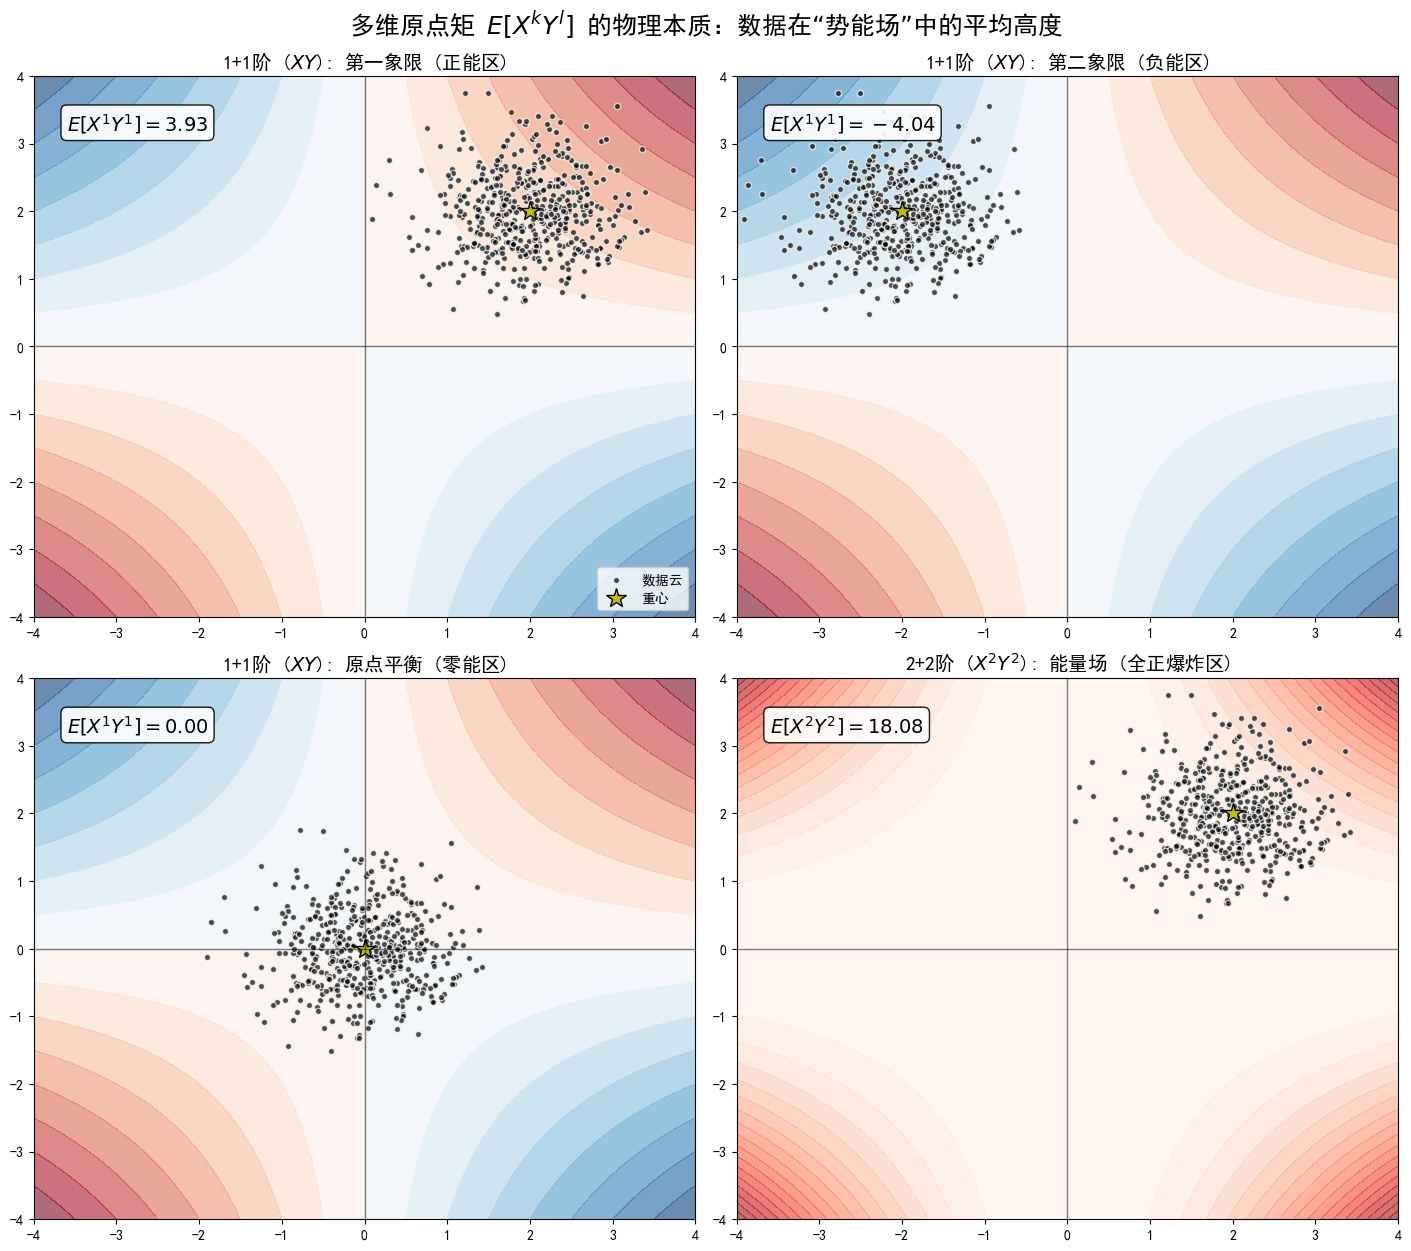

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
import os

# ==============================================================================
# 核心笔记 1.3 (重构)：多维原点矩的“势能场”视角
# ==============================================================================
# 核心思想：
# E[X^k Y^l] 本质上是计算数据点在函数 g(x,y) = x^k * y^l 生成的“地形”上的平均高度。
#
# 1. 地形 (Field): 由 k 和 l 决定。
#    - 1+1 (XY): 马鞍面。Q1/Q3为正峰，Q2/Q4为深谷。
#    - 2+2 (X^2Y^2): 碗状面。全为正，离原点越远越高。
#
# 2. 积分 (Moment): 
#    - 原点矩极其依赖数据的位置 (Location)。
#    - 哪怕数据形状不变，只要位置一动，原点矩的值就会剧烈变化。
# ==============================================================================

output_dir = "moment_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# ==========================================
# 0. 基础设置
# ==========================================
np.random.seed(2025)
n_samples = 500

# 生成一个标准的圆形高斯分布 (形状固定，只移动位置)
base_data = np.random.normal(0, 0.6, size=(n_samples, 2)) # 稍微紧凑一点方便观察

# 网格生成 (用于绘制背景场)
x_grid = np.linspace(-4, 4, 200)
y_grid = np.linspace(-4, 4, 200)
X_mesh, Y_mesh = np.meshgrid(x_grid, y_grid)

# ==========================================
# 1. 场景定义
# ==========================================
# 我们定义 4 个子图的配置
scenarios = [
    # (k, l, data_center_x, data_center_y, title)
    (1, 1,  2,  2, r'1+1阶 ($XY$): 第一象限 (正能区)'),
    (1, 1, -2,  2, r'1+1阶 ($XY$): 第二象限 (负能区)'),
    (1, 1,  0,  0, r'1+1阶 ($XY$): 原点平衡 (零能区)'),
    (2, 2,  2,  2, r'2+2阶 ($X^2 Y^2$): 能量场 (全正爆炸区)')
]

# ==========================================
# 2. 绘图循环
# ==========================================
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2, 2, figsize=(14, 12), constrained_layout=True)
axes = axes.flatten()

for i, (k, l, cx, cy, title) in enumerate(scenarios):
    ax = axes[i]
    
    # --- A. 计算背景场 (Potential Field) ---
    Z_field = (X_mesh ** k) * (Y_mesh ** l)
    
    # 为了可视化效果，对 Z_field 的颜色映射做归一化
    # 1+1阶用双向色标(红蓝)，2+2阶用单向色标(红)
    if k==1 and l==1:
        norm = TwoSlopeNorm(vmin=-16, vcenter=0, vmax=16)
        cmap = 'RdBu_r' # 蓝负红正
    else:
        norm = None
        cmap = 'Reds'   # 全正
        
    # 绘制等高线填充图
    # alpha=0.6 让背景稍微淡一点，突出前景点
    contour = ax.contourf(X_mesh, Y_mesh, Z_field, levels=20, cmap=cmap, norm=norm, alpha=0.6)
    
    # --- B. 生成并绘制数据 (Particles) ---
    # 平移数据到指定中心
    data_x = base_data[:, 0] + cx
    data_y = base_data[:, 1] + cy
    
    # 计算该位置下的原点矩数值
    moment_val = np.mean((data_x**k) * (data_y**l))
    
    # 绘制散点
    # 根据点所在位置的场值来给点边框染色，增加融合感
    ax.scatter(data_x, data_y, c='black', s=20, alpha=0.7, edgecolor='white', label='数据云')
    
    # 标记重心
    ax.plot(cx, cy, 'y*', markersize=15, markeredgecolor='black', label='重心')

    # --- C. 装饰与标注 ---
    ax.axhline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    
    # 关键：在图上标注计算结果
    # 使用 bbox 突出显示结果
    note_text = rf"$E[X^{k}Y^{l}] = {moment_val:.2f}$"
    ax.text(0.05, 0.9, note_text, transform=ax.transAxes, fontsize=14, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.9))
            
    if i == 0:
        ax.legend(loc='lower right')

# 添加统一色条 (仅针对1+1阶的范围，大致示意)
# fig.colorbar(contour, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label='势能场值')

plt.suptitle(r'多维原点矩 $E[X^k Y^l]$ 的物理本质：数据在“势能场”中的平均高度', fontsize=18, y=1.03)

save_path = f"{output_dir}/joint_origin_moments_field.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"图片已保存: {save_path}")
plt.show()

图片已保存: moment_images/moments_properties_decomposition_sync.png


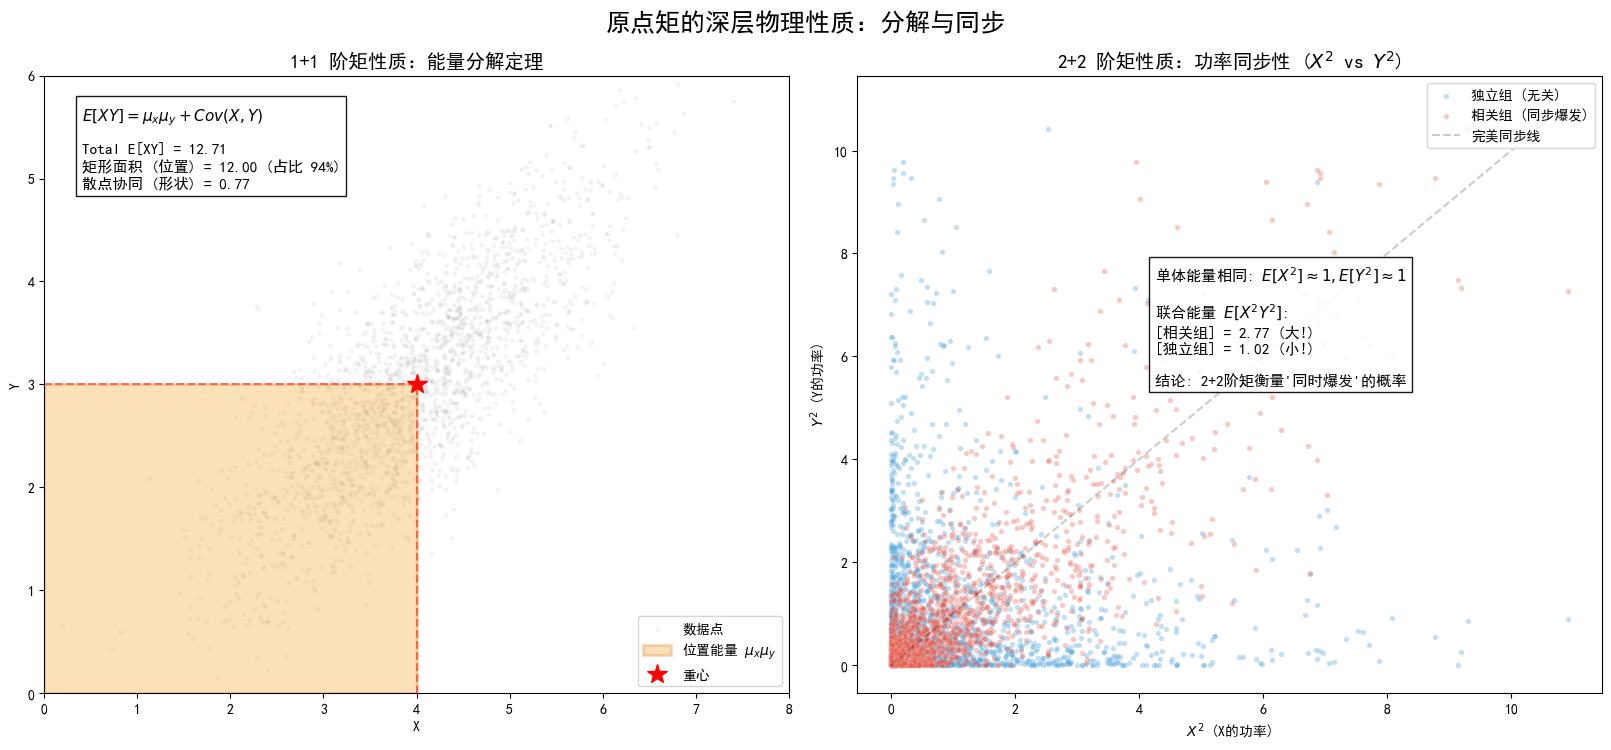

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import os

# ==============================================================================
# 核心笔记 1.3 (进阶修复版)：原点矩的性质解构
# ==============================================================================
# 修复内容：
# 1. 数学修正：协方差 cov_xy 从 1.5 改为 0.8 (必须 <= sqrt(1*1))。
# 2. 字体修正：移除 SimHei 不支持的 Emoji，改用文本标记。
# ==============================================================================

output_dir = "moment_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# ==========================================
# 0. 数据构造 (控制变量法)
# ==========================================
np.random.seed(42)
n = 2000

# --- 数据组 A: 用于展示 1+1 分解 ---
mu_x, mu_y = 4, 3
# [修正1] 协方差不能大于方差(这里是1)。设为 0.8 以保证矩阵正定。
cov_xy = 0.8 
data_A = np.random.multivariate_normal([mu_x, mu_y], [[1, cov_xy], [cov_xy, 1]], n)
X_A, Y_A = data_A[:, 0], data_A[:, 1]

# --- 数据组 B & C: 用于展示 2+2 同步性 ---
# Group B: 强相关
cov_strong = [[1, 0.9], [0.9, 1]]
data_B = np.random.multivariate_normal([0, 0], cov_strong, n)
X_B, Y_B = data_B[:, 0], data_B[:, 1]

# Group C: 独立
X_C = X_B.copy()
Y_C = Y_B.copy()
np.random.shuffle(Y_C) # 打乱

# ==========================================
# 1. 绘图：性质解构
# ==========================================
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1, 2, figsize=(16, 7), constrained_layout=True)

# --- 图1: 1+1 阶的几何分解 (E[XY]) ---
ax1 = axes[0]
sns.scatterplot(x=X_A, y=Y_A, alpha=0.1, color='gray', s=10, ax=ax1, label='数据点')

# 画"位置能量"矩形
rect = Rectangle((0, 0), mu_x, mu_y, linewidth=2, edgecolor='#e67e22', facecolor='#f39c12', alpha=0.3, label=r'位置能量 $\mu_x \mu_y$')
ax1.add_patch(rect)

# 标注重心
ax1.plot(mu_x, mu_y, 'r*', markersize=15, label='重心')
ax1.plot([0, mu_x], [mu_y, mu_y], 'r--', alpha=0.5)
ax1.plot([mu_x, mu_x], [0, mu_y], 'r--', alpha=0.5)

# 计算数值
exy = np.mean(X_A * Y_A)
term1 = mu_x * mu_y
term2 = np.mean((X_A - mu_x) * (Y_A - mu_y)) 

ax1.set_title(r'1+1 阶矩性质：能量分解定理', fontsize=14, fontweight='bold')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0, 8)
ax1.set_ylim(0, 6)

msg = (r"$E[XY] = \mu_x \mu_y + Cov(X,Y)$" + "\n\n" +
       rf"Total E[XY] = {exy:.2f}" + "\n" +
       rf"矩形面积 (位置) = {term1:.2f} (占比 {term1/exy:.0%})" + "\n" +
       rf"散点协同 (形状) = {term2:.2f}")
ax1.text(0.05, 0.95, msg, transform=ax1.transAxes, va='top', bbox=dict(facecolor='white', alpha=0.9), fontsize=11)
ax1.legend(loc='lower right')


# --- 图2: 2+2 阶的同步特性 (E[X^2 Y^2]) ---
ax2 = axes[1]

sns.scatterplot(x=X_C**2, y=Y_C**2, alpha=0.3, color='#3498db', s=15, ax=ax2, label=r'独立组 (无关)')
sns.scatterplot(x=X_B**2, y=Y_B**2, alpha=0.3, color='#e74c3c', s=15, ax=ax2, label=r'相关组 (同步爆发)')

moment_22_corr = np.mean((X_B**2) * (Y_B**2))
moment_22_indep = np.mean((X_C**2) * (Y_C**2))

ax2.set_title(r'2+2 阶矩性质：功率同步性 ($X^2$ vs $Y^2$)', fontsize=14, fontweight='bold')
ax2.set_xlabel(r'$X^2$ (X的功率)')
ax2.set_ylabel(r'$Y^2$ (Y的功率)')

line_limit = np.max(X_B**2)
ax2.plot([0, line_limit], [0, line_limit], 'k--', alpha=0.2, label='完美同步线')

# [修正2] 移除 Emoji，改用文字描述
msg2 = (r"单体能量相同: $E[X^2] \approx 1, E[Y^2] \approx 1$" + "\n\n" +
        r"联合能量 $E[X^2 Y^2]$:" + "\n" +
        rf"[相关组] = {moment_22_corr:.2f} (大!)" + "\n" +
        rf"[独立组] = {moment_22_indep:.2f} (小!)" + "\n\n" +
        r"结论: 2+2阶矩衡量'同时爆发'的概率")

ax2.text(0.4, 0.5, msg2, transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.9, edgecolor='black'), fontsize=11, fontweight='bold')
ax2.legend(loc='upper right')

plt.suptitle(r'原点矩的深层物理性质：分解与同步', fontsize=18, y=1.05)

save_path = f"{output_dir}/moments_properties_decomposition_sync.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"图片已保存: {save_path}")
plt.show()

In [ ]:
# ==============================================================================
# 核心笔记 1.3：多维混合矩 (Joint Moments) - 能量的耦合
# ==============================================================================
#
# 1. 乘法的哲学 (The Philosophy of Multiplication)
# ------------------------------------------------------------------------------
# 混合矩的核心运算是 X * Y。
# 在物理上，乘法代表【耦合】(Coupling) 或 【同时性】(Simultaneity)。
# 只有当两个信号“同时”起作用时，混合矩才会有值。
#
# 2. 原点矩 vs 中心矩 (Origin vs Central)
# ------------------------------------------------------------------------------
# [1+1 阶]
#   - 原点矩 E[XY]: 【总互能量】。包含均值带来的直流能量。
#     应用：计算信号的总功率、互相关函数。
#   - 中心矩 Cov(X,Y): 【协同波动】。剥离均值，只看变化趋势。
#     应用：金融中的贝塔系数、统计相关性。
#
#   * 分解公式: E[XY] = Cov(X,Y) + E[X]E[Y]
#
# [2+2 阶]
#   - 原点矩 E[X^2 Y^2]: 【联合功率】。
#     如果 X 和 Y 有相关性，它们会倾向于“同时爆发”，导致此值暴涨。
#     应用：极端风险建模 (大地震往往伴随大海啸)。
#
# 3. 几何直觉 (Geometry)
# ------------------------------------------------------------------------------
# - Cov > 0: 散点分布在一、三象限 (同向力)。
# - Cov < 0: 散点分布在二、四象限 (反向力)。
# - Cov = 0: 散点均匀分布或呈圆形 (力相互抵消)。
# ==============================================================================

图片已保存: moment_images/joint_central_moments_shapes.png


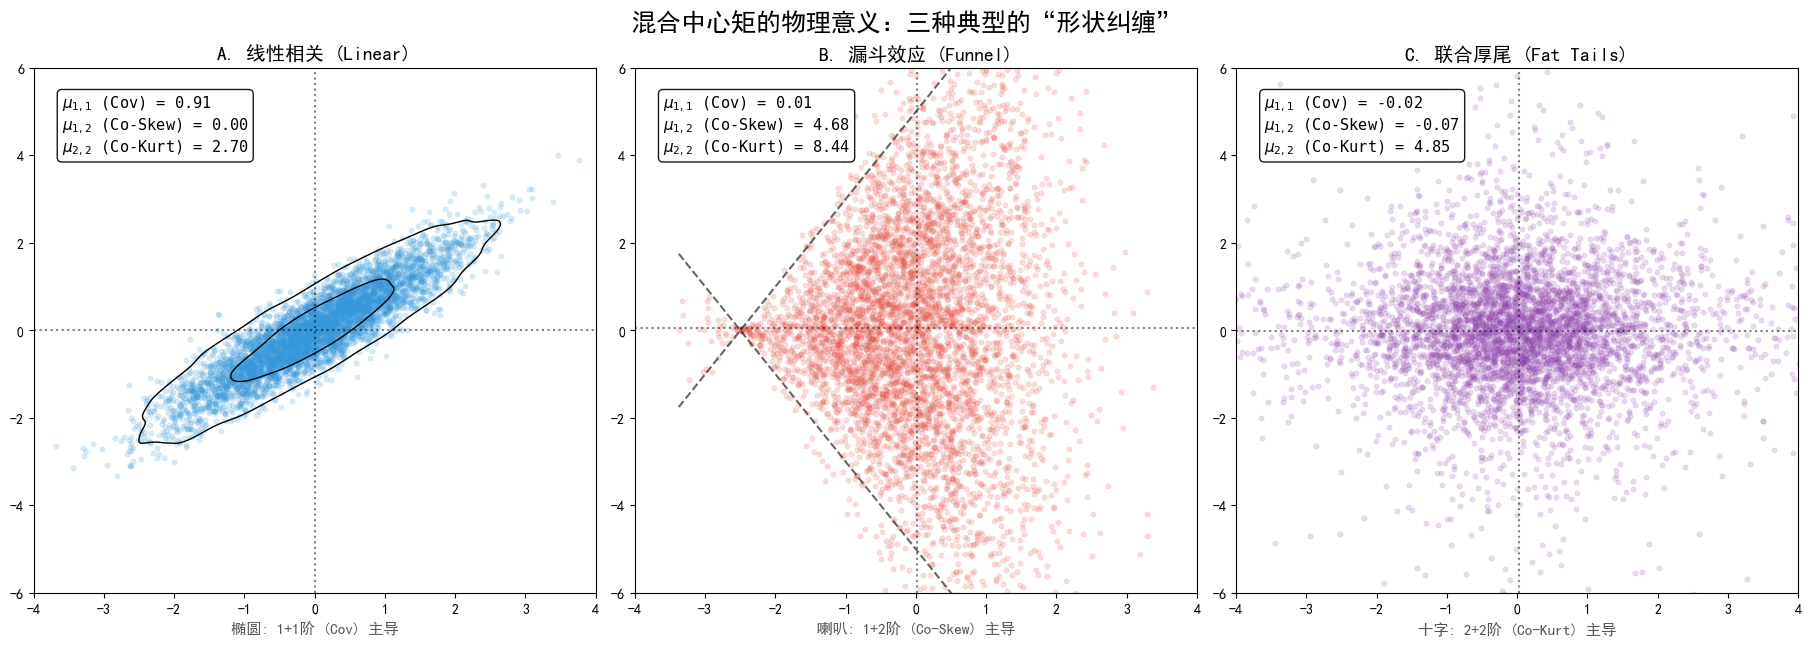

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# ==============================================================================
# 核心笔记 1.3 (中心矩篇)：混合中心矩的形状解构
# ==============================================================================
# 修复内容：修正 stats.t.rvs 调用，使用正确的 size 参数生成独立厚尾数据。
# ==============================================================================

output_dir = "moment_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

np.random.seed(42)
n = 5000

# ==========================================
# 1. 数据构造：三种不同的"纠缠"
# ==========================================

# --- A. 线性相关 (主场: Covariance) ---
cov_matrix = [[1, 0.9], [0.9, 1]]
data_linear = np.random.multivariate_normal([0, 0], cov_matrix, n)
XA, YA = data_linear[:, 0], data_linear[:, 1]

# --- B. 漏斗效应 (主场: Co-Skewness) ---
XB = np.random.normal(0, 1, n)
YB = np.random.normal(0, 1, n) * (XB + 2.5) 

# --- C. 联合厚尾 (主场: Co-Kurtosis) ---
# [FIXED] 使用 size 参数生成两个独立的 t-分布变量，再进行堆叠。
XC = stats.t.rvs(df=3, size=n, loc=0, scale=1) 
YC = stats.t.rvs(df=3, size=n, loc=0, scale=1) 
data_t = np.stack((XC, YC), axis=1) # 堆叠成二维数组

XC, YC = data_t[:, 0], data_t[:, 1]
# 截断一下太极端的点方便画图
mask = (np.abs(XC) < 10) & (np.abs(YC) < 10)
XC, YC = XC[mask], YC[mask]

# ==========================================
# 2. 辅助函数：计算混合中心矩
# ==========================================
def calc_joint_central_moments(x, y):
    x_c = x - np.mean(x)
    y_c = y - np.mean(y)
    
    # 1+1: Covariance
    m11 = np.mean(x_c * y_c)
    
    # 1+2: Co-skewness (衡量 Y 的方差是否受 X 影响)
    m12 = np.mean(x_c * (y_c**2))
    
    # 2+2: Co-kurtosis (衡量联合极端值)
    m22 = np.mean((x_c**2) * (y_c**2))
    
    return m11, m12, m22

# ==========================================
# 3. 绘图：三张图看清形状
# ==========================================
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# 数据打包
scenarios = [
    (XA, YA, 'A. 线性相关 (Linear)', '椭圆: 1+1阶 (Cov) 主导', '#3498db'),
    (XB, YB, 'B. 漏斗效应 (Funnel)', '喇叭: 1+2阶 (Co-Skew) 主导', '#e74c3c'),
    (XC, YC, 'C. 联合厚尾 (Fat Tails)', '十字: 2+2阶 (Co-Kurt) 主导', '#8e44ad')
]

for i, (x, y, title, subtitle, color) in enumerate(scenarios):
    ax = axes[i]
    
    # 1. 绘制散点
    sns.scatterplot(x=x, y=y, alpha=0.2, s=15, color=color, edgecolor=None, ax=ax)
    
    # 2. 绘制重心
    ax.axvline(np.mean(x), color='black', linestyle=':', alpha=0.5)
    ax.axhline(np.mean(y), color='black', linestyle=':', alpha=0.5)
    
    # 3. 计算并标注矩
    m11, m12, m22 = calc_joint_central_moments(x, y)
    
    # 4. 视觉增强：画出特征轮廓
    if i == 0: # 椭圆
        sns.kdeplot(x=x, y=y, levels=3, color='black', linewidths=1, ax=ax)
    elif i == 1: # 漏斗边界
        xx = np.linspace(x.min(), x.max(), 100)
        ax.plot(xx, 2*(xx+2.5), 'k--', alpha=0.6)
        ax.plot(xx, -2*(xx+2.5), 'k--', alpha=0.6)
    
    # 5. 文字面板
    stats_text = (
        rf"$\mu_{{1,1}}$ (Cov) = {m11:.2f}" + "\n" +
        rf"$\mu_{{1,2}}$ (Co-Skew) = {m12:.2f}" + "\n" +
        rf"$\mu_{{2,2}}$ (Co-Kurt) = {m22:.2f}"
    )
    
    # 高亮最显著的特征
    box_props = dict(boxstyle='round', facecolor='white', alpha=0.9)
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, va='top', bbox=box_props, fontsize=11, fontfamily='monospace')
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(subtitle, fontsize=11, color='#555555')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-6, 6)

# 统一调整
plt.suptitle('混合中心矩的物理意义：三种典型的“形状纠缠”', fontsize=18, y=1.05)

save_path = f"{output_dir}/joint_central_moments_shapes.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"图片已保存: {save_path}")
plt.show()

In [ ]:
# ==============================================================================
# 核心笔记 1.3 (终章)：多维矩的完整物理图景 (The Big Picture of Joint Moments)
# ==============================================================================
#
# 1. 两个世界的对立 (Origin vs Central)
# ------------------------------------------------------------------------------
# [混合原点矩 E(X^k Y^l)]: 能量与位置
#   - 它是“绝对值”。包含了数据“在哪里”(均值) 和 “怎么动”(方差/协方差)。
#   - 物理直觉：势能场中的平均高度。位置一变，数值剧变。
#   - 核心性质：E[XY] = Cov(X,Y) + \mu_x\mu_y (能量分解)。
#
# [混合中心矩 E((X-\mu)^k (Y-\mu)^l)]: 形状与纠缠
#   - 它是“相对值”。剥离了位置，只看两个变量如何“配合”。
#   - 物理直觉：描述散点图的形状特征 (胖瘦、歪斜、炸裂)。
#
# 2. 形状词典 (The Shape Dictionary)
# ------------------------------------------------------------------------------
# 当我们观察二维散点图时，不同的形状对应不同的高阶矩：
#
#   A. 倾斜的椭圆 (Tilted Ellipse) -> 1+1 阶 (Covariance)
#      - 关键词：【方向】。
#      - 意义：线性共进退。你大我也大。
#
#   B. 喇叭口/漏斗 (Funnel) -> 1+2 阶 (Co-Skewness)
#      - 关键词：【异方差 / 传染】。
#      - 意义：状态决定波动。X 变大时，Y 变得更不可预测。
#
#   C. 十字星/炸裂 (Burst/Star) -> 2+2 阶 (Co-Kurtosis)
#      - 关键词：【共振 / 极端风险】。
#      - 意义：黑天鹅成对出现。平时无关，极端时联动。
#
# 3. 为什么这一步至关重要？
# ------------------------------------------------------------------------------
# 在进入"样本矩"之前，必须理解：
# 我们手中的样本数据 (Sample)，只是上帝手中总体分布 (Population) 的一次投影。
# 
# 接下来的挑战是：
# 当我们只有有限的 n 个数据点时，如何用它们算出来的“样本协方差”、“样本偏度”，
# 去猜上述这些完美的理论形状？这就引出了——【样本矩及其收敛性】。
# ==============================================================================

In [ ]:
# 2.1. 样本 k 阶原点矩

In [ ]:
# ==============================================================================
# 核心笔记 2.1：样本 k 阶原点矩 (A_k)
# ==============================================================================
#
# 1. 定义 (The Formula)
# ------------------------------------------------------------------------------
# A_k = (1/n) * sum(X_i^k)
#
# 这里的 X_i 是样本点。A_k 本身是一个【统计量】，也是一个【随机变量】。
#
# 2. 核心特例
# ------------------------------------------------------------------------------
# k=1 -> 样本均值 (Sample Mean, \bar{X})。
#      它是总体均值 \mu 的无偏估计。
#
# k=2 -> 样本二阶原点矩 (Sample Mean Square)。
#      它是总体二阶原点矩 E[X^2] 的无偏估计。
#      常用于计算样本方差：S_biased^2 = A_2 - (A_1)^2
#
# 3. 统计性质 (Statistical Properties)
# ------------------------------------------------------------------------------
# - 无偏性 (Unbiased): E[A_k] = \alpha_k
#   (只要样本是独立同分布 i.i.d 的，这一点永远成立)
#
# - 收敛性 (Consistency): 当 n -> inf 时，A_k -> \alpha_k (依概率收敛)。
#   这就是【大数定律】的直接体现。
#
# 4. 关键直觉 (The Key Intuition)
# ------------------------------------------------------------------------------
# "用凡人的平均值，去猜测上帝的期望值。"
# 样本量 n 越大，A_k 离 \alpha_k 越近（波动越小）。
# ==============================================================================

图片已保存: moment_images/sample_origin_moments_convergence.png


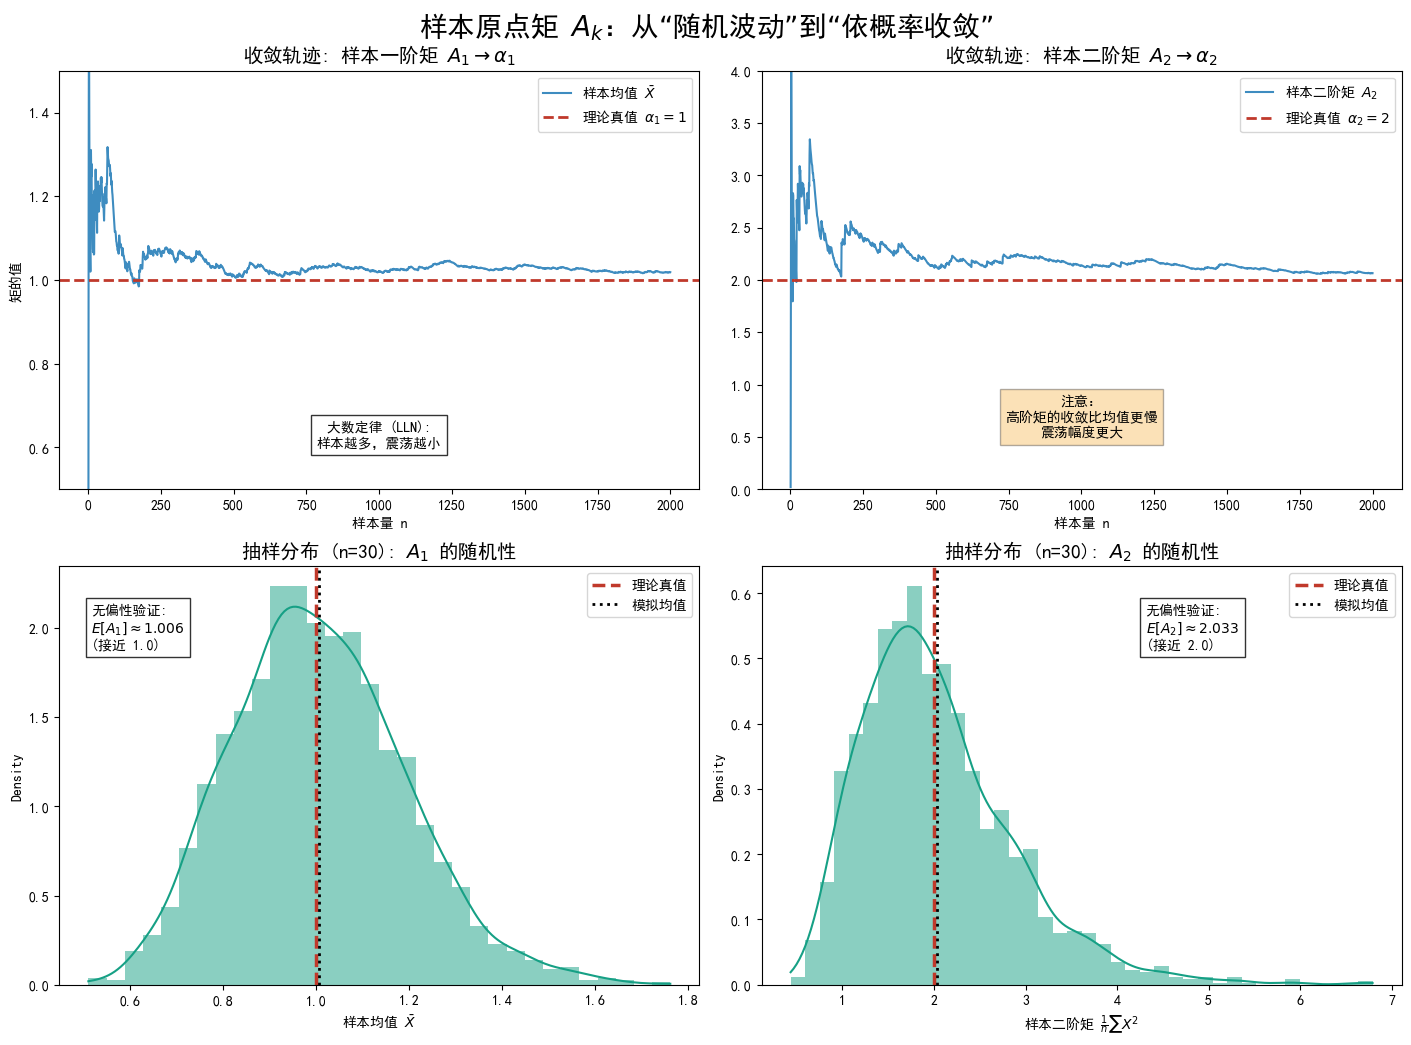

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# ==============================================================================
# 核心笔记 2.1：样本原点矩 (Sample Origin Moments) - 随机与收敛
# ==============================================================================
# 1. 我们的靶子 (总体): 指数分布 Exp(1)
#    - 理论一阶矩 (均值) \alpha_1 = 1
#    - 理论二阶矩 (均方) \alpha_2 = Var + Mean^2 = 1 + 1 = 2
#
# 2. 实验设计:
#    - Row 1 (轨迹): 随着 n (1->2000) 增加，A_k 如何逼近 \alpha_k？(大数定律)
#    - Row 2 (分布): 固定 n=30，做 2000 次实验，看 A_k 的分布。(中心极限定理+无偏性)
# ==============================================================================

output_dir = "moment_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# ==========================================
# 0. 数据构造
# ==========================================
np.random.seed(2025)

# 设定总体参数: Exp(lambda=1) -> mean=1, var=1
# E[X] = 1, E[X^2] = 2
true_alpha1 = 1.0
true_alpha2 = 2.0

# --- 实验 A: 收敛轨迹 (Law of Large Numbers) ---
n_max = 2000
# 生成一个巨大的样本序列
stream_data = np.random.exponential(scale=1.0, size=n_max)

# 计算累积矩 (Cumulative Moments)
# cumsum / [1, 2, ..., n]
traj_A1 = np.cumsum(stream_data) / np.arange(1, n_max + 1)
traj_A2 = np.cumsum(stream_data**2) / np.arange(1, n_max + 1)

# --- 实验 B: 抽样分布 (Sampling Distribution) ---
n_fixed = 30  # 小样本
n_trials = 2000 # 重复做两千次实验

# 生成 (2000, 30) 的矩阵
batch_data = np.random.exponential(scale=1.0, size=(n_trials, n_fixed))

# 计算每一次实验的样本矩
# axis=1 表示对每一行(每一次实验)求平均
dist_A1 = np.mean(batch_data, axis=1)
dist_A2 = np.mean(batch_data**2, axis=1)

# ==========================================
# 1. 绘图：收敛与分布
# ==========================================
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# 颜色定义
c_line = '#2980b9'  # 轨迹蓝
c_true = '#c0392b'  # 真值红
c_hist = '#16a085'  # 分布绿

# --- Row 1 Left: 一阶矩 (均值) 收敛轨迹 ---
ax1 = axes[0, 0]
x_axis = np.arange(1, n_max + 1)
ax1.plot(x_axis, traj_A1, color=c_line, linewidth=1.5, alpha=0.9, label=r'样本均值 $\bar{X}$')
ax1.axhline(true_alpha1, color=c_true, linestyle='--', linewidth=2, label=r'理论真值 $\alpha_1=1$')

ax1.set_title(r'收敛轨迹: 样本一阶矩 $A_1 \to \alpha_1$', fontsize=14, fontweight='bold')
ax1.set_xlabel('样本量 n')
ax1.set_ylabel('矩的值')
ax1.legend(loc='upper right')
ax1.set_ylim(0.5, 1.5)
ax1.text(1000, 0.6, "大数定律 (LLN):\n样本越多，震荡越小", ha='center', bbox=dict(facecolor='white', alpha=0.8))


# --- Row 1 Right: 二阶矩 (均方) 收敛轨迹 ---
ax2 = axes[0, 1]
ax2.plot(x_axis, traj_A2, color=c_line, linewidth=1.5, alpha=0.9, label=r'样本二阶矩 $A_2$')
ax2.axhline(true_alpha2, color=c_true, linestyle='--', linewidth=2, label=r'理论真值 $\alpha_2=2$')

ax2.set_title(r'收敛轨迹: 样本二阶矩 $A_2 \to \alpha_2$', fontsize=14, fontweight='bold')
ax2.set_xlabel('样本量 n')
ax2.legend(loc='upper right')
ax2.set_ylim(0, 4)
# 标注震荡对比
ax2.text(1000, 0.5, "注意：\n高阶矩的收敛比均值更慢\n震荡幅度更大", ha='center', bbox=dict(facecolor='#f39c12', alpha=0.3))


# --- Row 2 Left: 一阶矩的抽样分布 (n=30) ---
ax3 = axes[1, 0]
sns.histplot(dist_A1, kde=True, color=c_hist, stat='density', ax=ax3, alpha=0.5, edgecolor=None)
ax3.axvline(true_alpha1, color=c_true, linestyle='--', linewidth=2.5, label='理论真值')
ax3.axvline(np.mean(dist_A1), color='black', linestyle=':', linewidth=2, label='模拟均值')

ax3.set_title(r'抽样分布 (n=30): $A_1$ 的随机性', fontsize=14, fontweight='bold')
ax3.set_xlabel(r'样本均值 $\bar{X}$')
ax3.legend()
ax3.text(0.05, 0.8, r"无偏性验证:" + "\n" + rf"$E[A_1] \approx {np.mean(dist_A1):.3f}$" + "\n" + r"(接近 1.0)", 
         transform=ax3.transAxes, bbox=dict(facecolor='white', alpha=0.8))


# --- Row 2 Right: 二阶矩的抽样分布 (n=30) ---
ax4 = axes[1, 1]
sns.histplot(dist_A2, kde=True, color=c_hist, stat='density', ax=ax4, alpha=0.5, edgecolor=None)
ax4.axvline(true_alpha2, color=c_true, linestyle='--', linewidth=2.5, label='理论真值')
ax4.axvline(np.mean(dist_A2), color='black', linestyle=':', linewidth=2, label='模拟均值')

ax4.set_title(r'抽样分布 (n=30): $A_2$ 的随机性', fontsize=14, fontweight='bold')
ax4.set_xlabel(r'样本二阶矩 $\frac{1}{n}\sum X^2$')
ax4.legend()
ax4.text(0.6, 0.8, r"无偏性验证:" + "\n" + rf"$E[A_2] \approx {np.mean(dist_A2):.3f}$" + "\n" + r"(接近 2.0)", 
         transform=ax4.transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.suptitle(r'样本原点矩 $A_k$：从“随机波动”到“依概率收敛”', fontsize=20, y=1.03)

save_path = f"{output_dir}/sample_origin_moments_convergence.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"图片已保存: {save_path}")
plt.show()

In [ ]:
# 2.2. 样本 k 阶中心矩

图片已保存: moment_images_sample/sample_moments_visualization.png


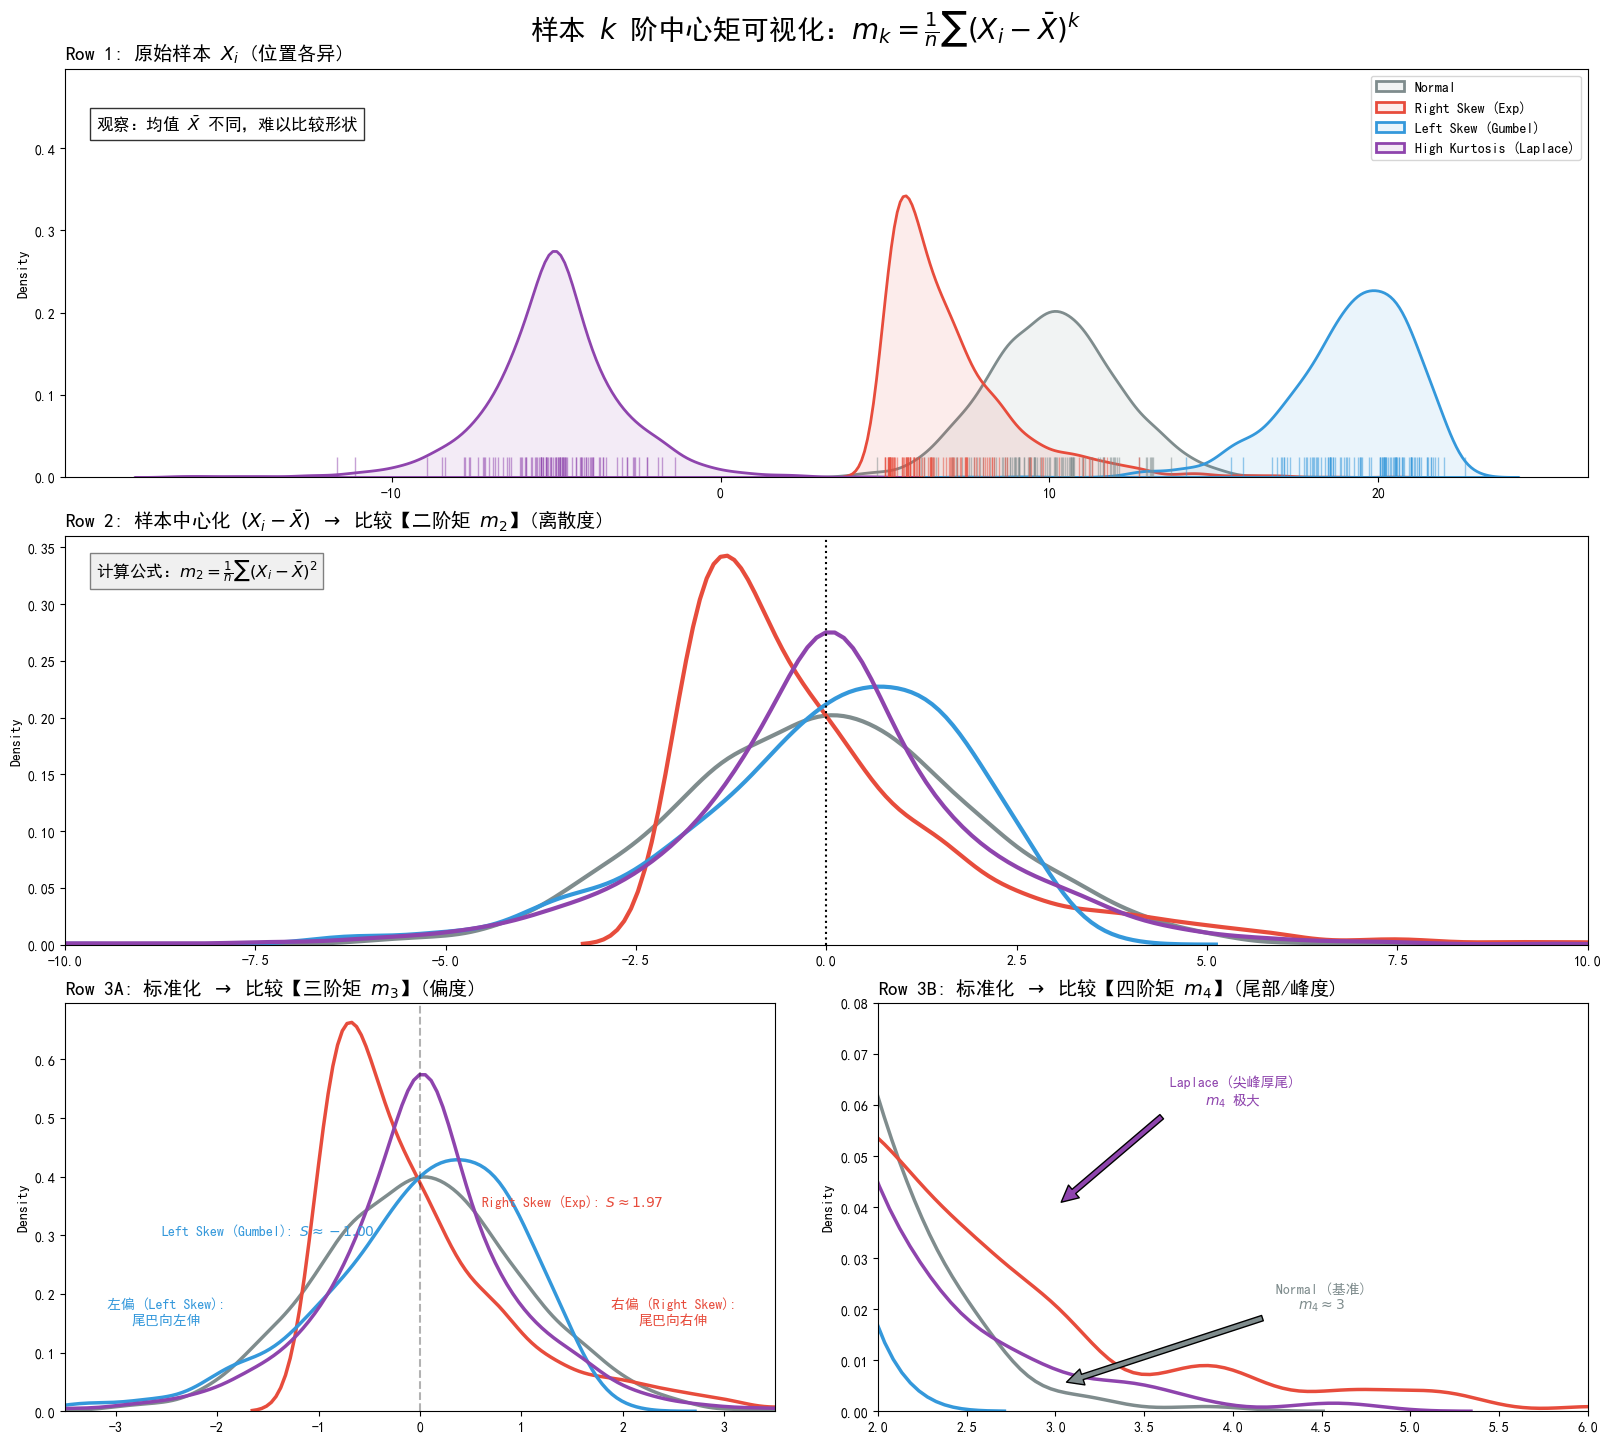

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# ==============================================================================
# 样本 k 阶中心矩可视化：从原始数据到形状特征的 1+1+2 解构
# ==============================================================================

output_dir = "moment_images_sample"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# ==========================================
# 0. 样本构造 (Sample Generation)
# ==========================================
np.random.seed(42)
n = 2000  # 样本容量 n

# 1. Normal: 基准 (对称，中等尾部)
data_norm = np.random.normal(loc=10, scale=2, size=n)

# 2. Exponential: 强右偏 (Right Skewed)
# 指数分布平移，使其均值不同
data_exp = np.random.exponential(scale=2, size=n) + 5 

# 3. Gumbel (Left): 强左偏 (Left Skewed) - 使用反转的 Gumbel 或 Beta
data_left = -np.random.gumbel(loc=0, scale=1.5, size=n) + 20

# 4. Laplace: 尖峰厚尾 (Leptokurtic)
data_laplace = np.random.laplace(loc=0, scale=1.5, size=n) - 5

datasets = {
    'Normal': data_norm,
    'Right Skew (Exp)': data_exp,
    'Left Skew (Gumbel)': data_left,
    'High Kurtosis (Laplace)': data_laplace
}

colors = {
    'Normal': '#7f8c8d',           # 灰
    'Right Skew (Exp)': '#e74c3c', # 红
    'Left Skew (Gumbel)': '#3498db',# 蓝
    'High Kurtosis (Laplace)': '#8e44ad' # 紫
}

# ==========================================
# 1. 计算处理 (Calculation)
# ==========================================
plot_data = {'Raw': {}, 'Centered': {}, 'Standardized': {}}
sample_stats = {}

for name, data in datasets.items():
    # 1. 样本均值 (一阶原点矩)
    x_bar = np.mean(data)
    
    # 2. 样本二阶中心矩 (即有偏方差 m2)
    m2 = np.mean((data - x_bar)**2)
    std_sample = np.sqrt(m2)
    
    # 3. 样本高阶中心矩 m3, m4
    m3 = np.mean((data - x_bar)**3)
    m4 = np.mean((data - x_bar)**4)
    
    # 归一化系数 (用于标注)
    skewness = m3 / (m2**1.5)
    kurtosis = m4 / (m2**2) - 3 # Excess Kurtosis
    
    sample_stats[name] = {'mean': x_bar, 'm2': m2, 'skew': skewness, 'kurt': kurtosis}
    
    # 存储绘图数据
    plot_data['Raw'][name] = data
    plot_data['Centered'][name] = data - x_bar
    plot_data['Standardized'][name] = (data - x_bar) / std_sample

# ==========================================
# 2. 绘图：1+1+2 布局 (Plotting)
# ==========================================
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans'] # 适配中文
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(16, 14), constrained_layout=True)
gs = fig.add_gridspec(3, 2)

# --- Row 1: 原始样本 (Raw Samples) ---
ax1 = fig.add_subplot(gs[0, :])

for name, data in plot_data['Raw'].items():
    sns.kdeplot(data, fill=True, alpha=0.1, label=name, color=colors[name], ax=ax1, linewidth=2)
    # 添加 rugplot 展示 "样本点" 的离散性
    sns.rugplot(data[:100], color=colors[name], ax=ax1, height=0.05, alpha=0.5)

ax1.set_title(r'Row 1: 原始样本 $X_i$ (位置各异)', fontsize=14, fontweight='bold', loc='left')
ax1.legend(loc='upper right')
ax1.text(0.02, 0.85, r"观察：均值 $\bar{X}$ 不同，难以比较形状", transform=ax1.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))


# --- Row 2: 样本中心化 (Centered Samples) ---
ax2 = fig.add_subplot(gs[1, :])

for name, data in plot_data['Centered'].items():
    sns.kdeplot(data, fill=False, linewidth=3, label=name, color=colors[name], ax=ax2)

ax2.axvline(0, color='black', linestyle=':', linewidth=1.5, label=r'重心 $\bar{X}=0$')
ax2.set_title(r'Row 2: 样本中心化 $(X_i - \bar{X})$ $\to$ 比较【二阶矩 $m_2$】(离散度)', fontsize=14, fontweight='bold', loc='left')
ax2.set_xlim(-10, 10)

# 标注方差
txt = r"计算公式：$m_2 = \frac{1}{n}\sum(X_i - \bar{X})^2$"
ax2.text(0.02, 0.9, txt, transform=ax2.transAxes, fontsize=12, bbox=dict(facecolor='#f0f0f0', edgecolor='gray'))


# --- Row 3 Left: 三阶矩/偏度 (Skewness) ---
ax3 = fig.add_subplot(gs[2, 0])

for name, z in plot_data['Standardized'].items():
    sns.kdeplot(z, fill=False, linewidth=2.5, label=name, color=colors[name], ax=ax3)

ax3.axvline(0, color='k', linestyle='--', alpha=0.3)
ax3.set_title(r'Row 3A: 标准化 $\to$ 比较【三阶矩 $m_3$】(偏度)', fontsize=14, fontweight='bold', loc='left')
ax3.set_xlim(-3.5, 3.5)

# 标注偏度值
y_pos = 0.35
for name, stats_val in sample_stats.items():
    sk = stats_val['skew']
    if abs(sk) > 0.5: # 只标注明显的偏度
        ax3.text(1.5 if sk > 0 else -1.5, y_pos, rf"{name}: $S \approx {sk:.2f}$", 
                 color=colors[name], ha='center', fontsize=10, fontweight='bold')
        y_pos -= 0.05

ax3.text(-2.5, 0.15, r"左偏 (Left Skew):" + "\n" + r"尾巴向左伸", color=colors['Left Skew (Gumbel)'], ha='center')
ax3.text(2.5, 0.15, r"右偏 (Right Skew):" + "\n" + r"尾巴向右伸", color=colors['Right Skew (Exp)'], ha='center')


# --- Row 3 Right: 四阶矩/峰度 (Kurtosis) ---
ax4 = fig.add_subplot(gs[2, 1])

for name, z in plot_data['Standardized'].items():
    sns.kdeplot(z, fill=False, linewidth=2.5, label=name, color=colors[name], ax=ax4)

ax4.set_xlim(2.0, 6.0) # 放大尾部
ax4.set_ylim(0, 0.08)
ax4.set_title(r'Row 3B: 标准化 $\to$ 比较【四阶矩 $m_4$】(尾部/峰度)', fontsize=14, fontweight='bold', loc='left')

# 标注峰度
ax4.annotate(r'Laplace (尖峰厚尾)' + '\n' + r'$m_4$ 极大', xy=(3.0, 0.04), xytext=(4.0, 0.06),
             arrowprops=dict(facecolor=colors['High Kurtosis (Laplace)'], shrink=0.05),
             color=colors['High Kurtosis (Laplace)'], ha='center', fontweight='bold')

ax4.annotate(r'Normal (基准)' + '\n' + r'$m_4 \approx 3$', xy=(3.0, 0.005), xytext=(4.5, 0.02),
             arrowprops=dict(facecolor=colors['Normal'], shrink=0.05),
             color=colors['Normal'], ha='center')

plt.suptitle(r'样本 $k$ 阶中心矩可视化：$m_k = \frac{1}{n}\sum (X_i - \bar{X})^k$', fontsize=20, y=1.02)

save_path = f"{output_dir}/sample_moments_visualization.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"图片已保存: {save_path}")
plt.show()

In [ ]:
# 2.3. 样本矩的收敛性

图片已保存: moment_images_sample/convergence_plot.png


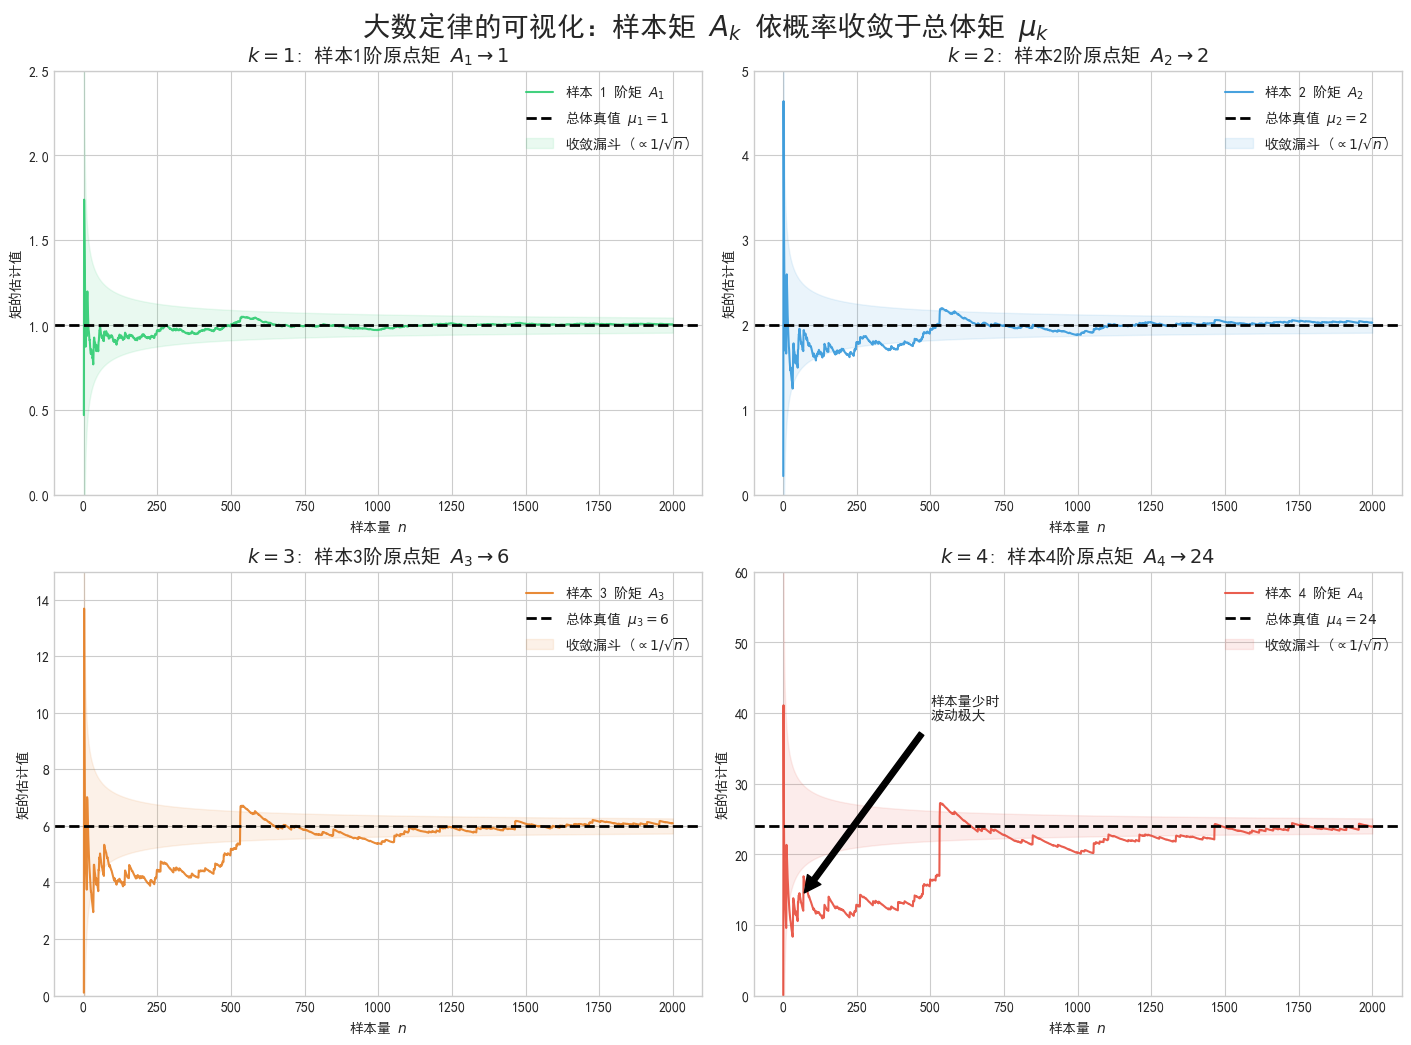

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# 2.3. 样本矩的收敛性可视化：从混沌到秩序
# ==============================================================================

# 设置风格
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 1. 构造总体：指数分布 Exponential(lambda=1)
# 选择指数分布是因为它的理论矩非常容易计算：
# Mean (k=1) = 1
# E[X^2] (k=2) = 2
# E[X^3] (k=3) = 6
# E[X^4] (k=4) = 24
true_moments = {1: 1, 2: 2, 3: 6, 4: 24}
colors = {1: '#2ecc71', 2: '#3498db', 3: '#e67e22', 4: '#e74c3c'} # 绿蓝橙红

# 2. 模拟采样过程
np.random.seed(42)
max_n = 2000
# 生成一次性的大样本，然后逐步截断计算
data = np.random.exponential(scale=1.0, size=max_n)

# 准备存储轨迹
# X轴是 n (1 到 max_n)
ns = np.arange(1, max_n + 1)
sample_moments = {k: np.zeros(max_n) for k in true_moments}

# 利用 cumsum (累加和) 快速计算动态平均，避免循环
# A_k(n) = (Sum_{i=1}^n X_i^k) / n
for k in true_moments:
    power_data = data ** k
    cumulative_sum = np.cumsum(power_data)
    sample_moments[k] = cumulative_sum / ns

# 3. 绘图
fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)
axes = axes.flatten()

for i, k in enumerate(true_moments):
    ax = axes[i]
    c = colors[k]
    truth = true_moments[k]
    estimates = sample_moments[k]
    
    # 绘制样本矩轨迹
    ax.plot(ns, estimates, color=c, alpha=0.9, linewidth=1.5, label=f'样本 {k} 阶矩 $A_{k}$')
    
    # 绘制理论真值线
    ax.axhline(truth, color='black', linestyle='--', linewidth=2, label=rf'总体真值 $\mu_{k}={truth}$')
    
    # 添加误差带 (Confidence Interval visual aid, conceptually 1/sqrt(n))
    # 仅为了视觉效果展示收敛漏斗
    upper = truth + (truth * 2) / np.sqrt(ns) 
    lower = truth - (truth * 2) / np.sqrt(ns)
    ax.fill_between(ns, lower, upper, color=c, alpha=0.1, label=r'收敛漏斗 ($\propto 1/\sqrt{n}$)')
    
    # 设置标签和标题
    ax.set_title(rf"$k={k}$: 样本{k}阶原点矩 $A_{k} \to {truth}$", fontsize=14, fontweight='bold')
    ax.set_xlabel("样本量 $n$")
    ax.set_ylabel("矩的估计值")
    
    # 标注起始点的剧烈波动
    if k == 4:
        ax.annotate('样本量少时\n波动极大', xy=(50, estimates[50]), xytext=(500, truth+15),
                    arrowprops=dict(facecolor='black', shrink=0.05))
        
    ax.legend(loc='upper right')
    
    # 动态调整Y轴范围以便观察收敛
    # 忽略前10个极不稳定的点来定范围
    y_center = truth
    y_range = truth * 1.5
    ax.set_ylim(max(0, y_center - y_range), y_center + y_range)

plt.suptitle(r'大数定律的可视化：样本矩 $A_k$ 依概率收敛于总体矩 $\mu_k$', fontsize=20, y=1.03)

save_path = "moment_images_sample/convergence_plot.png"
if not os.path.exists("moment_images_sample"): os.makedirs("moment_images_sample")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"图片已保存: {save_path}")
plt.show()